# Imports

In [1]:
import pandas as pd
import numpy as np
import scipy

# sklearn
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

# deep learning
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df1 = pd.DataFrame(pd.read_excel('./data/X_bp.xlsx', index_col=0))
df1

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            1.857143       2030.000000   
1                            1.857143       2030.000000   
2                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  
0                       3000.000000               220.000000  
1                       3000.000000               220.000000  
2                       3000.000000               220.000000  
3                       3000.000000               220.000000  
4                       3000.000000               220.000000  
...                             ...                      ...  
1018                    2387.292495               125.007669  
1019                    2360.392784               117.730099  
1020                    2662.906040               236.606764  
1021                    2071.715856               197.126067  
1022                    2856.328932               194.754342  

[1023 rows x 10 columns]

In [3]:
df2 = pd.DataFrame(pd.read_excel('./data/X_nup.xlsx', index_col=0))
df2

Угол нашивки, град  Шаг нашивки  Плотность нашивки
0                      0     4.000000          57.000000
1                      0     4.000000          60.000000
2                      0     4.000000          70.000000
3                      0     5.000000          47.000000
4                      0     5.000000          57.000000
...                  ...          ...                ...
1035                  90     8.088111          47.759177
1036                  90     7.619138          66.931932
1037                  90     9.800926          72.858286
1038                  90    10.079859          65.519479
1039                  90     9.021043          66.920143

[1040 rows x 3 columns]

In [4]:
df = pd.concat([df1, df2], join='inner', axis=1)
df.sample(5)

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
279                         4.434429       2061.918771             328.876626   
548                         2.505018       2043.225729             947.563433   
287                         3.183372       1953.008677            1409.793826   
640                         3.603262       1998.709005             760.881311   
791                         3.426368       2028.026074             453.458891   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
279                    81.071393                        23.213218   
548                   107.172872                        21.141384   
287                    63.548428                        24.861055   
640                   125.495521                        25.906781   
791                   105.674852                        22.415611   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
279                244.874100                     934.780246   
548                334.538100                     665.277923   
287                225.514802                     633.151898   
640                263.805111                     378.020970   
791                413.273418                     586.715020   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
279                             76.238258                    2995.952606   
548                             79.892087                    2461.043398   
287                             73.551929                    2324.703278   
640                             73.595083                    3249.856261   
791                             74.838137                    2334.649515   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
279               178.066150                   0     2.788476   
548               164.365856                  90     9.379064   
287               235.951687                   0    11.361013   
640               171.711493                  90     4.945255   
791               233.293376                  90     5.256326   

     Плотность нашивки  
279          11.740126  
548          49.540731  
287          50.031691  
640          51.945279  
791          46.966045

In [5]:
df_cor = df.corr()
df_cor

Соотношение матрица-наполнитель  \
Соотношение матрица-наполнитель                              1.000000   
Плотность, кг/м3                                             0.003841   
модуль упругости, ГПа                                        0.031700   
Количество отвердителя, м.%                                 -0.006445   
Содержание эпоксидных групп,%_2                              0.019766   
Температура вспышки, С_2                                    -0.004776   
Поверхностная плотность, г/м2                               -0.006272   
Модуль упругости при растяжении, ГПа                        -0.008411   
Прочность при растяжении, МПа                                0.024148   
Потребление смолы, г/м2                                      0.072531   
Угол нашивки, град                                          -0.031073   
Шаг нашивки                                                  0.036437   
Плотность нашивки                                           -0.004652   

                                      Плотность, кг/м3  модуль упругости, ГПа  \
Соотношение матрица-наполнитель               0.003841               0.031700   
Плотность, кг/м3                              1.000000              -0.009647   
модуль упругости, ГПа                        -0.009647               1.000000   
Количество отвердителя, м.%                  -0.035911               0.024049   
Содержание эпоксидных групп,%_2              -0.008278              -0.006804   
Температура вспышки, С_2                     -0.020695               0.031174   
Поверхностная плотность, г/м2                 0.044930              -0.005306   
Модуль упругости при растяжении, ГПа         -0.017602               0.023267   
Прочность при растяжении, МПа                -0.069981               0.041868   
Потребление смолы, г/м2                      -0.015937               0.001840   
Угол нашивки, град                           -0.068474              -0.025417   
Шаг нашивки                                  -0.061015              -0.009875   
Плотность нашивки                             0.080304               0.056346   

                                      Количество отвердителя, м.%  \
Соотношение матрица-наполнитель                         -0.006445   
Плотность, кг/м3                                        -0.035911   
модуль упругости, ГПа                                    0.024049   
Количество отвердителя, м.%                              1.000000   
Содержание эпоксидных групп,%_2                         -0.000684   
Температура вспышки, С_2                                 0.095193   
Поверхностная плотность, г/м2                            0.055198   
Модуль упругости при растяжении, ГПа                    -0.065929   
Прочность при растяжении, МПа                           -0.075375   
Потребление смолы, г/м2                                  0.007446   
Угол нашивки, град                                       0.038570   
Шаг нашивки                                              0.014887   
Плотность нашивки                                        0.017248   

                                      Содержание эпоксидных групп,%_2  \
Соотношение матрица-наполнитель                              0.019766   
Плотность, кг/м3                                            -0.008278   
модуль упругости, ГПа                                       -0.006804   
Количество отвердителя, м.%                                 -0.000684   
Содержание эпоксидных групп,%_2                              1.000000   
Температура вспышки, С_2                                    -0.009769   
Поверхностная плотность, г/м2                               -0.012940   
Модуль упругости при растяжении, ГПа                         0.056828   
Прочность при растяжении, МПа                               -0.023899   
Потребление смолы, г/м2                                      0.015165   
Угол нашивки, град                                           0.008052   
Шаг нашивки                          

In [129]:
df.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1000.000000       1000.000000   
mean                          2.930612       1975.666791   
std                           0.913939         73.796817   
min                           0.389403       1731.764635   
25%                           2.318526       1924.203433   
50%                           2.907832       1977.574305   
75%                           3.552539       2021.159498   
max                           5.591742       2207.773481   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1000.000000                  1000.000000   
mean              739.950520                   110.541116   
std               330.327013                    28.304470   
min                 2.436909                    17.740275   
25%               498.438068                    92.170589   
50%               741.148111                   110.162666   
75%               962.851423                   130.311975   
max              1911.536477                   198.953207   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1000.000000               1000.000000   
mean                         22.243850                285.911287   
std                           2.406999                 40.962756   
min                          14.254985                160.255843   
25%                          20.558296                258.539199   
50%                          22.230761                285.853960   
75%                          23.982115                313.581449   
max                          28.955094                413.273418   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1000.000000                           1000.000000   
mean                      483.024665                             73.328462   
std                       280.811736                              3.119584   
min                         0.603740                             64.054061   
25%                       268.057473                             71.301753   
50%                       452.972263                             73.247594   
75%                       694.210382                             75.379739   
max                      1399.542362                             82.682051   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                    1000.000000              1000.000000   
mean                     2467.184290               218.386876   
std                       485.624616                59.819777   
min                      1036.856605                33.803026   
25%                      2143.834592               179.190489   
50%                      2461.249253               217.277006   
75%                      2760.163022               257.495647   
max                      3848.436732               414.590628   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  Kmeans_claster  
count         1000.000000  1000.000000        1000.000000     1000.000000  
mean            45.000000     6.909904          57.181470        4.363000  
std             45.022517     2.560031          12.304355        2.909587  
min              0.000000     0.037639          11.740126        0.000000  
25%              0.000000     5.116518          49.821889        2.000000  
50%             45.000000     6.913444          57.362576        4.000000  
75%             90.000000     8.585130          64.986942        7.000000  
max             90.000000    14.440522         103.988901        9.000000

In [131]:
df.shape

(1000, 14)

<Axes: >

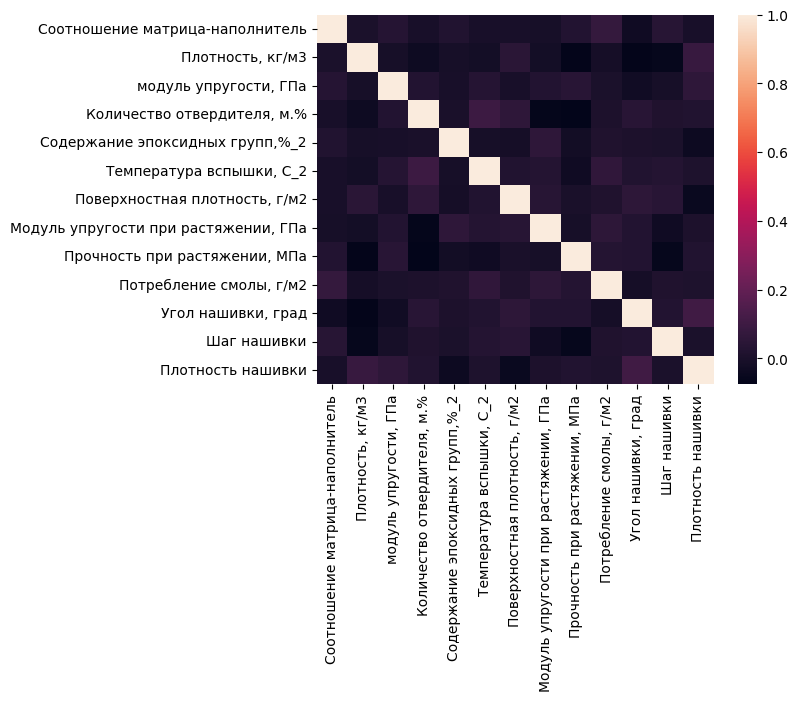

In [6]:
sns.heatmap(df_cor) 

# Анализ записей на предмет соответствия дробной части общей тенденции датасета

Предположение: В первых n записей были замечены числа без дробной части, что выделяется на фоне остального датасета, если данная тендения наблюдается только единичных случаях вначале датасета то это весьма подозрительные данные которые скорее всего были округлены до целого

In [7]:
df.loc[(df['Плотность, кг/м3'] % 1 == 0), ]

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                          1.857143            2030.0             738.736842   
1                          1.857143            2030.0             738.736842   
2                          1.857143            2030.0             738.736842   
3                          1.857143            2030.0             738.736842   
4                          2.771331            2030.0             753.000000   
5                          2.767918            2000.0             748.000000   
6                          2.569620            1910.0             807.000000   
7                          2.561475            1900.0             535.000000   
8                          3.557018            1930.0             889.000000   
9                          3.532338            2100.0            1421.000000   
10                         2.919678            2160.0             933.000000   
11                         2.877358            1990.0            1628.000000   
12                         1.598174            1950.0             827.000000   
13                         2.919678            1980.0             568.000000   
14                         4.029126            1910.0             800.000000   
15                         2.934783            2030.0             302.000000   
16                         3.557018            1880.0             313.000000   
17                         4.193548            1950.0             506.000000   
18                         4.897959            1890.0             540.000000   
19                         3.532338            1980.0            1183.000000   
20                         2.877358            2000.0             205.000000   
21                         1.598174            1920.0             456.000000   
22                         4.029126            1880.0             622.000000   

    Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                         30.00                        22.267857   
1                         50.00                        23.750000   
2                         49.90                        33.000000   
3                        129.00                        21.250000   
4                        111.86                        22.267857   
5                        111.86                        22.267857   
6                        111.86                        22.267857   
7                        111.86                        22.267857   
8                        129.00                        21.250000   
9                        129.00                        21.250000   
10                       129.00                        21.250000   
11                       129.00                        21.250000   
12                       129.00                        21.250000   
13                       129.00                        21.250000   
14                       129.00                        21.250000   
15                       129.00                        21.250000   
16                       129.00                        21.250000   
17                       129.00                        21.250000   
18                       129.00                        21.250000   
19                       111.86                        22.267857   
20                       111.86                        22.267857   
21                       111.86                        22.267857   
22                       111.86                        22.267857   

    Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                 100.000000                          210.0   
1                 284.615385                          210.0   
2                 284.615385                          210.0   
3                 300.000000                          210.0   
4                 284.615385                          210.0   
5                 284.615385                          210.0   
6        

In [8]:
df.loc[(df['модуль упругости, ГПа'] % 1 == 0), ]

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
4                          2.771331            2030.0                  753.0   
5                          2.767918            2000.0                  748.0   
6                          2.569620            1910.0                  807.0   
7                          2.561475            1900.0                  535.0   
8                          3.557018            1930.0                  889.0   
9                          3.532338            2100.0                 1421.0   
10                         2.919678            2160.0                  933.0   
11                         2.877358            1990.0                 1628.0   
12                         1.598174            1950.0                  827.0   
13                         2.919678            1980.0                  568.0   
14                         4.029126            1910.0                  800.0   
15                         2.934783            2030.0                  302.0   
16                         3.557018            1880.0                  313.0   
17                         4.193548            1950.0                  506.0   
18                         4.897959            1890.0                  540.0   
19                         3.532338            1980.0                 1183.0   
20                         2.877358            2000.0                  205.0   
21                         1.598174            1920.0                  456.0   
22                         4.029126            1880.0                  622.0   

    Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
4                        111.86                        22.267857   
5                        111.86                        22.267857   
6                        111.86                        22.267857   
7                        111.86                        22.267857   
8                        129.00                        21.250000   
9                        129.00                        21.250000   
10                       129.00                        21.250000   
11                       129.00                        21.250000   
12                       129.00                        21.250000   
13                       129.00                        21.250000   
14                       129.00                        21.250000   
15                       129.00                        21.250000   
16                       129.00                        21.250000   
17                       129.00                        21.250000   
18                       129.00                        21.250000   
19                       111.86                        22.267857   
20                       111.86                        22.267857   
21                       111.86                        22.267857   
22                       111.86                        22.267857   

    Температура вспышки, С_2  Поверхностная плотность, г/м2  \
4                 284.615385                          210.0   
5                 284.615385                          210.0   
6                 284.615385                          210.0   
7                 284.615385                          380.0   
8                 300.000000                          380.0   
9                 300.000000                         1010.0   
10                300.000000                         1010.0   
11                300.000000                         1010.0   
12                300.000000                          470.0   
13                300.000000                          470.0   
14                300.000000                          470.0   
15                300.000000                          210.0   
16                300.000000                          210.0   
17                300.000000                          380.0   
18                300.000000                          380.0   
19                284.615385      

In [9]:
df.loc[(df['Количество отвердителя, м.%'] % 1 == 0), ]

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                          1.857143            2030.0             738.736842   
1                          1.857143            2030.0             738.736842   
3                          1.857143            2030.0             738.736842   
8                          3.557018            1930.0             889.000000   
9                          3.532338            2100.0            1421.000000   
10                         2.919678            2160.0             933.000000   
11                         2.877358            1990.0            1628.000000   
12                         1.598174            1950.0             827.000000   
13                         2.919678            1980.0             568.000000   
14                         4.029126            1910.0             800.000000   
15                         2.934783            2030.0             302.000000   
16                         3.557018            1880.0             313.000000   
17                         4.193548            1950.0             506.000000   
18                         4.897959            1890.0             540.000000   

    Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                          30.0                        22.267857   
1                          50.0                        23.750000   
3                         129.0                        21.250000   
8                         129.0                        21.250000   
9                         129.0                        21.250000   
10                        129.0                        21.250000   
11                        129.0                        21.250000   
12                        129.0                        21.250000   
13                        129.0                        21.250000   
14                        129.0                        21.250000   
15                        129.0                        21.250000   
16                        129.0                        21.250000   
17                        129.0                        21.250000   
18                        129.0                        21.250000   

    Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                 100.000000                          210.0   
1                 284.615385                          210.0   
3                 300.000000                          210.0   
8                 300.000000                          380.0   
9                 300.000000                         1010.0   
10                300.000000                         1010.0   
11                300.000000                         1010.0   
12                300.000000                          470.0   
13                300.000000                          470.0   
14                300.000000                          470.0   
15                300.000000                          210.0   
16                300.000000                          210.0   
17                300.000000                          380.0   
18                300.000000                          380.0   

    Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                              70.000000                    3000.000000   
1                              70.000000                    3000.000000   
3                              70.000000                    3000.000000   
8                              75.000000                    1800.000000   
9                              78.000000                    2000.000000   
10                             78.000000                    2000.000000   
11                             78.000000                    2000.000000   
12                             73.333333                    2455.555556   
13                             73.333333                    2455.555556   
14                             73.333333                    2455.555556   
15         

In [10]:
df.loc[(df['Содержание эпоксидных групп,%_2'] % 1 == 0), ]

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
2                         1.857143            2030.0             738.736842   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
2                         49.9                             33.0   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
2                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
2                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
2                    220.0                   0          4.0               70.0

In [11]:
df.loc[(df['Температура вспышки, С_2'] % 1 == 0), ]

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                          1.857143            2030.0             738.736842   
3                          1.857143            2030.0             738.736842   
8                          3.557018            1930.0             889.000000   
9                          3.532338            2100.0            1421.000000   
10                         2.919678            2160.0             933.000000   
11                         2.877358            1990.0            1628.000000   
12                         1.598174            1950.0             827.000000   
13                         2.919678            1980.0             568.000000   
14                         4.029126            1910.0             800.000000   
15                         2.934783            2030.0             302.000000   
16                         3.557018            1880.0             313.000000   
17                         4.193548            1950.0             506.000000   
18                         4.897959            1890.0             540.000000   

    Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                          30.0                        22.267857   
3                         129.0                        21.250000   
8                         129.0                        21.250000   
9                         129.0                        21.250000   
10                        129.0                        21.250000   
11                        129.0                        21.250000   
12                        129.0                        21.250000   
13                        129.0                        21.250000   
14                        129.0                        21.250000   
15                        129.0                        21.250000   
16                        129.0                        21.250000   
17                        129.0                        21.250000   
18                        129.0                        21.250000   

    Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                      100.0                          210.0   
3                      300.0                          210.0   
8                      300.0                          380.0   
9                      300.0                         1010.0   
10                     300.0                         1010.0   
11                     300.0                         1010.0   
12                     300.0                          470.0   
13                     300.0                          470.0   
14                     300.0                          470.0   
15                     300.0                          210.0   
16                     300.0                          210.0   
17                     300.0                          380.0   
18                     300.0                          380.0   

    Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                              70.000000                    3000.000000   
3                              70.000000                    3000.000000   
8                              75.000000                    1800.000000   
9                              78.000000                    2000.000000   
10                             78.000000                    2000.000000   
11                             78.000000                    2000.000000   
12                             73.333333                    2455.555556   
13                             73.333333                    2455.555556   
14                             73.333333                    2455.555556   
15                             70.000000                    3000.000000   
16                             70.000000                    3000.000000   
17                             75.000000                    1800.000000   
18                             75.000000                    1800.000000 

In [12]:
df.loc[(df['Поверхностная плотность, г/м2'] % 1 == 0), ]

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                          1.857143            2030.0             738.736842   
1                          1.857143            2030.0             738.736842   
2                          1.857143            2030.0             738.736842   
3                          1.857143            2030.0             738.736842   
4                          2.771331            2030.0             753.000000   
5                          2.767918            2000.0             748.000000   
6                          2.569620            1910.0             807.000000   
7                          2.561475            1900.0             535.000000   
8                          3.557018            1930.0             889.000000   
9                          3.532338            2100.0            1421.000000   
10                         2.919678            2160.0             933.000000   
11                         2.877358            1990.0            1628.000000   
12                         1.598174            1950.0             827.000000   
13                         2.919678            1980.0             568.000000   
14                         4.029126            1910.0             800.000000   
15                         2.934783            2030.0             302.000000   
16                         3.557018            1880.0             313.000000   
17                         4.193548            1950.0             506.000000   
18                         4.897959            1890.0             540.000000   
19                         3.532338            1980.0            1183.000000   
20                         2.877358            2000.0             205.000000   
21                         1.598174            1920.0             456.000000   
22                         4.029126            1880.0             622.000000   

    Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                         30.00                        22.267857   
1                         50.00                        23.750000   
2                         49.90                        33.000000   
3                        129.00                        21.250000   
4                        111.86                        22.267857   
5                        111.86                        22.267857   
6                        111.86                        22.267857   
7                        111.86                        22.267857   
8                        129.00                        21.250000   
9                        129.00                        21.250000   
10                       129.00                        21.250000   
11                       129.00                        21.250000   
12                       129.00                        21.250000   
13                       129.00                        21.250000   
14                       129.00                        21.250000   
15                       129.00                        21.250000   
16                       129.00                        21.250000   
17                       129.00                        21.250000   
18                       129.00                        21.250000   
19                       111.86                        22.267857   
20                       111.86                        22.267857   
21                       111.86                        22.267857   
22                       111.86                        22.267857   

    Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                 100.000000                          210.0   
1                 284.615385                          210.0   
2                 284.615385                          210.0   
3                 300.000000                          210.0   
4                 284.615385                          210.0   
5                 284.615385                          210.0   
6        

In [13]:
df.loc[(df['Модуль упругости при растяжении, ГПа'] % 1 == 0), ]

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                          1.857143            2030.0             738.736842   
1                          1.857143            2030.0             738.736842   
2                          1.857143            2030.0             738.736842   
3                          1.857143            2030.0             738.736842   
4                          2.771331            2030.0             753.000000   
5                          2.767918            2000.0             748.000000   
6                          2.569620            1910.0             807.000000   
7                          2.561475            1900.0             535.000000   
8                          3.557018            1930.0             889.000000   
9                          3.532338            2100.0            1421.000000   
10                         2.919678            2160.0             933.000000   
11                         2.877358            1990.0            1628.000000   
15                         2.934783            2030.0             302.000000   
16                         3.557018            1880.0             313.000000   
17                         4.193548            1950.0             506.000000   
18                         4.897959            1890.0             540.000000   
19                         3.532338            1980.0            1183.000000   
20                         2.877358            2000.0             205.000000   

    Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                         30.00                        22.267857   
1                         50.00                        23.750000   
2                         49.90                        33.000000   
3                        129.00                        21.250000   
4                        111.86                        22.267857   
5                        111.86                        22.267857   
6                        111.86                        22.267857   
7                        111.86                        22.267857   
8                        129.00                        21.250000   
9                        129.00                        21.250000   
10                       129.00                        21.250000   
11                       129.00                        21.250000   
15                       129.00                        21.250000   
16                       129.00                        21.250000   
17                       129.00                        21.250000   
18                       129.00                        21.250000   
19                       111.86                        22.267857   
20                       111.86                        22.267857   

    Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                 100.000000                          210.0   
1                 284.615385                          210.0   
2                 284.615385                          210.0   
3                 300.000000                          210.0   
4                 284.615385                          210.0   
5                 284.615385                          210.0   
6                 284.615385                          210.0   
7                 284.615385                          380.0   
8                 300.000000                          380.0   
9                 300.000000                         1010.0   
10                300.000000                         1010.0   
11                300.000000                         1010.0   
15                300.000000                          210.0   
16                300.000000                          210.0   
17                300.000000                          380.0   
18                300.000000                          380.0   
19                284.615385                         1010.0   
20                284.615385                         101

In [14]:
df.loc[(df['Прочность при растяжении, МПа'] % 1 == 0), ]

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                          1.857143            2030.0             738.736842   
1                          1.857143            2030.0             738.736842   
2                          1.857143            2030.0             738.736842   
3                          1.857143            2030.0             738.736842   
4                          2.771331            2030.0             753.000000   
5                          2.767918            2000.0             748.000000   
6                          2.569620            1910.0             807.000000   
7                          2.561475            1900.0             535.000000   
8                          3.557018            1930.0             889.000000   
9                          3.532338            2100.0            1421.000000   
10                         2.919678            2160.0             933.000000   
11                         2.877358            1990.0            1628.000000   
15                         2.934783            2030.0             302.000000   
16                         3.557018            1880.0             313.000000   
17                         4.193548            1950.0             506.000000   
18                         4.897959            1890.0             540.000000   
19                         3.532338            1980.0            1183.000000   
20                         2.877358            2000.0             205.000000   

    Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                         30.00                        22.267857   
1                         50.00                        23.750000   
2                         49.90                        33.000000   
3                        129.00                        21.250000   
4                        111.86                        22.267857   
5                        111.86                        22.267857   
6                        111.86                        22.267857   
7                        111.86                        22.267857   
8                        129.00                        21.250000   
9                        129.00                        21.250000   
10                       129.00                        21.250000   
11                       129.00                        21.250000   
15                       129.00                        21.250000   
16                       129.00                        21.250000   
17                       129.00                        21.250000   
18                       129.00                        21.250000   
19                       111.86                        22.267857   
20                       111.86                        22.267857   

    Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                 100.000000                          210.0   
1                 284.615385                          210.0   
2                 284.615385                          210.0   
3                 300.000000                          210.0   
4                 284.615385                          210.0   
5                 284.615385                          210.0   
6                 284.615385                          210.0   
7                 284.615385                          380.0   
8                 300.000000                          380.0   
9                 300.000000                         1010.0   
10                300.000000                         1010.0   
11                300.000000                         1010.0   
15                300.000000                          210.0   
16                300.000000                          210.0   
17                300.000000                          380.0   
18                300.000000                          380.0   
19                284.615385                         1010.0   
20                284.615385                         101

In [15]:
df.loc[(df['Потребление смолы, г/м2'] % 1 == 0), ]

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                          1.857143            2030.0             738.736842   
1                          1.857143            2030.0             738.736842   
2                          1.857143            2030.0             738.736842   
3                          1.857143            2030.0             738.736842   
4                          2.771331            2030.0             753.000000   
5                          2.767918            2000.0             748.000000   
6                          2.569620            1910.0             807.000000   
7                          2.561475            1900.0             535.000000   
8                          3.557018            1930.0             889.000000   
9                          3.532338            2100.0            1421.000000   
10                         2.919678            2160.0             933.000000   
11                         2.877358            1990.0            1628.000000   
12                         1.598174            1950.0             827.000000   
13                         2.919678            1980.0             568.000000   
14                         4.029126            1910.0             800.000000   
15                         2.934783            2030.0             302.000000   
16                         3.557018            1880.0             313.000000   
17                         4.193548            1950.0             506.000000   
18                         4.897959            1890.0             540.000000   
19                         3.532338            1980.0            1183.000000   
20                         2.877358            2000.0             205.000000   
21                         1.598174            1920.0             456.000000   
22                         4.029126            1880.0             622.000000   

    Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                         30.00                        22.267857   
1                         50.00                        23.750000   
2                         49.90                        33.000000   
3                        129.00                        21.250000   
4                        111.86                        22.267857   
5                        111.86                        22.267857   
6                        111.86                        22.267857   
7                        111.86                        22.267857   
8                        129.00                        21.250000   
9                        129.00                        21.250000   
10                       129.00                        21.250000   
11                       129.00                        21.250000   
12                       129.00                        21.250000   
13                       129.00                        21.250000   
14                       129.00                        21.250000   
15                       129.00                        21.250000   
16                       129.00                        21.250000   
17                       129.00                        21.250000   
18                       129.00                        21.250000   
19                       111.86                        22.267857   
20                       111.86                        22.267857   
21                       111.86                        22.267857   
22                       111.86                        22.267857   

    Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                 100.000000                          210.0   
1                 284.615385                          210.0   
2                 284.615385                          210.0   
3                 300.000000                          210.0   
4                 284.615385                          210.0   
5                 284.615385                          210.0   
6        

Вывод: Значения без дробной части встречаются только в первых 22 случаях, что довольно подозрительно на фоне датасета в более чем 1000 записей

In [16]:
df = df[23:]
df

Соотношение матрица-наполнитель  Плотность, кг/м3  \
23                           2.587348       1953.274926   
24                           2.499918       1942.595777   
25                           2.046471       2037.631811   
26                           1.856476       2018.220332   
27                           3.305535       1917.907506   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
23              1136.596135                   137.627420   
24               901.519947                   146.252208   
25               707.570887                   101.617251   
26               836.294382                   135.401697   
27               478.286247                   105.786930   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
23                          22.344534                234.716883   
24                          23.081757                351.231874   
25                          23.146393                312.307205   
26                          26.435515                327.510377   
27                          17.874100                328.154579   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
23                       555.893453                             80.803222   
24                       864.725484                             76.178075   
25                       547.601219                             73.817067   
26                       150.961449                             77.210762   
27                       526.692159                             72.345709   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
23                      2587.342983               246.613117   
24                      3705.672523               226.222760   
25                      2624.026407               178.198556   
26                      2473.187195               123.344561   
27                      3059.032991               275.575880   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
23                

# Эксперимент с разбиением на n класстеров

Идея: попробуем разбить датасет на некоторое колличество кластеров, и посмотреть на кореляцию внутри этих кластеров

In [17]:
from sklearn.cluster import KMeans

## Метод локтя для подбора оптимального количества кластеров

In [18]:
distortions = []
for i in range(1, 30):
    kmeans = KMeans(
        n_clusters=i, # На сколько кластеров поделить наш ДС
        init='random', # Начальная инициализация центров кластеров
        n_init=10, # Начальное колиечтво этих точек (центров класстеров)
        max_iter=300, # 
        tol=1e-04 # Величина изменения при сдвиге
    )
    kmeans_prediction = kmeans.fit_predict(df)
    # plt.title(f"Clasterisations result with {i} clusters")
    # Draw our points
    # plt.scatter(df[:, 0], df[:, 1], c=kmeans_prediction)
    # Draw our clusters centers
    # plt.scatter(*kmeans.cluster_centers_.T, # Вызываем наши центыр и транспонируем нашу матрицу
    #             marker='*', 
    #             s=200, 
    #             color='r')
    # plt.show()
    distortions.append(kmeans.inertia_)

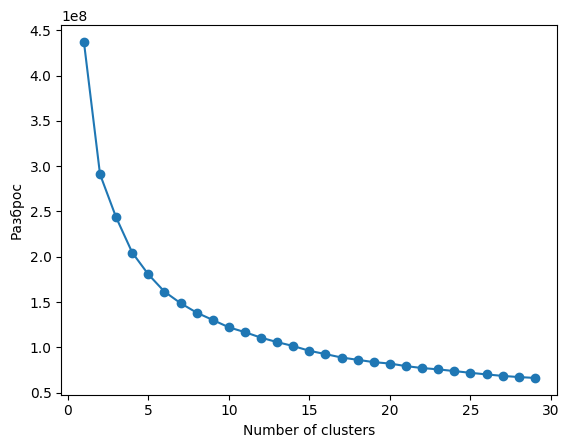

In [19]:
plt.plot(range(1,30), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Разброс')
plt.show()

## На основании вышепроведенного эксперимента по вычислению межкластерного расстояния, оно перестает значительно уменьшаться на 20 кластерах

In [20]:
kmeans = KMeans(
    n_clusters=20, # На сколько кластеров поделить наш ДС
    init='random', # Начальная инициализация центров кластеров
    n_init=10, # Начальное колиечтво этих точек (центров класстеров)
    max_iter=300, # 
    tol=1e-04 # Величина изменения при сдвиге
)
kmeans_prediction = kmeans.fit_predict(df)
kmeans_prediction

array([ 4,  6,  2, 11, 15,  0, 18,  2,  7, 18, 11,  5, 15,  1,  3, 10,  4,
       12, 14, 17,  0, 13, 19,  6, 11, 11,  3, 17, 17,  2,  2, 17, 10,  2,
        5,  2,  8, 17,  2, 14,  1, 15,  9,  1, 10,  5, 17, 19, 12,  3,  5,
        8, 10, 14, 13, 17,  9,  1, 14,  8,  7, 13, 11, 11,  5, 13,  3,  4,
       12,  2, 17,  9, 14, 13, 14,  5, 16,  2, 12, 17,  2, 18, 11,  6,  4,
        5, 11, 11, 11, 17,  3,  7,  0,  5, 10, 17, 19, 17, 12, 13, 18, 18,
       17,  3, 13, 11, 17,  1,  7, 18,  4, 18, 11,  9, 13, 11, 14,  2,  1,
        8,  1,  9,  8, 13,  2,  5,  1,  4,  2,  8,  3, 19,  3,  3,  7,  2,
       11,  8, 13,  4,  0, 18,  8, 11, 12, 14,  5,  4,  0,  6, 10, 10, 19,
       18, 10, 13, 15,  9, 10,  8, 14,  4,  6,  0, 13,  7, 14, 11, 10,  4,
       15, 17,  8, 11, 18, 10,  7, 11,  5,  7,  8, 10,  1,  3, 18,  5, 15,
        2, 13,  2, 11, 17,  4,  3, 11,  4,  5, 12,  3,  7,  7, 13,  2, 18,
        3, 10, 12,  9,  0, 14, 13, 15,  4,  8,  8,  4,  1, 11,  5,  0,  2,
       13, 18,  2,  4, 13

In [21]:
kmeans_prediction.shape

(1000,)

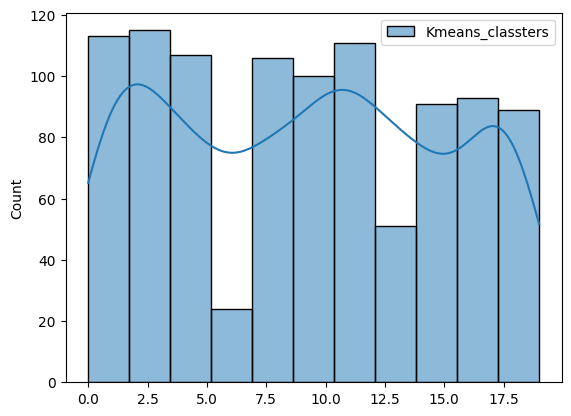

In [22]:
sns.histplot(data = {"Kmeans_classters": kmeans_prediction}, 
             kde=True)
plt.show()

In [23]:
df['Kmeans_claster'] = kmeans_prediction

In [24]:
ds_by_clusters = []
for n in range(1,20):
    one_clusster = df.loc[(df['Kmeans_claster'] == n), ]
    ds_by_clusters.append(one_clusster)

In [25]:
ds_by_clusters[0].shape

(60, 14)

In [26]:
ds_clasters_cor = ds_by_clusters[0].corr()
ds_clasters_cor

Соотношение матрица-наполнитель  \
Соотношение матрица-наполнитель                              1.000000   
Плотность, кг/м3                                             0.093894   
модуль упругости, ГПа                                       -0.014300   
Количество отвердителя, м.%                                  0.109124   
Содержание эпоксидных групп,%_2                              0.107237   
Температура вспышки, С_2                                    -0.033107   
Поверхностная плотность, г/м2                                0.130063   
Модуль упругости при растяжении, ГПа                        -0.059027   
Прочность при растяжении, МПа                                0.205112   
Потребление смолы, г/м2                                      0.050371   
Угол нашивки, град                                          -0.029042   
Шаг нашивки                                                  0.008121   
Плотность нашивки                                           -0.039567   
Kmeans_claster                                                    NaN   

                                      Плотность, кг/м3  модуль упругости, ГПа  \
Соотношение матрица-наполнитель               0.093894              -0.014300   
Плотность, кг/м3                              1.000000              -0.055965   
модуль упругости, ГПа                        -0.055965               1.000000   
Количество отвердителя, м.%                   0.049547               0.036011   
Содержание эпоксидных групп,%_2               0.084681              -0.032522   
Температура вспышки, С_2                     -0.017889              -0.232069   
Поверхностная плотность, г/м2                 0.147966               0.048043   
Модуль упругости при растяжении, ГПа          0.158761              -0.107792   
Прочность при растяжении, МПа                -0.081711               0.204853   
Потребление смолы, г/м2                      -0.024355               0.186638   
Угол нашивки, град                           -0.051713               0.221288   
Шаг нашивки                                  -0.048325              -0.053180   
Плотность нашивки                            -0.028806               0.111236   
Kmeans_claster                                     NaN                    NaN   

                                      Количество отвердителя, м.%  \
Соотношение матрица-наполнитель                          0.109124   
Плотность, кг/м3                                         0.049547   
модуль упругости, ГПа                                    0.036011   
Количество отвердителя, м.%                              1.000000   
Содержание эпоксидных групп,%_2                          0.081184   
Температура вспышки, С_2                                 0.121835   
Поверхностная плотность, г/м2                            0.013704   
Модуль упругости при растяжении, ГПа                    -0.226176   
Прочность при растяжении, МПа                            0.023842   
Потребление смолы, г/м2                                 -0.046936   
Угол нашивки, град                                      -0.015463   
Шаг нашивки                                             -0.191726   
Плотность нашивки                                        0.143921   
Kmeans_claster                                                NaN   

                                      Содержание эпоксидных групп,%_2  \
Соотношение матрица-наполнитель                              0.107237   
Плотность, кг/м3                                             0.084681   
модуль упругости, ГПа                                       -0.032522   
Количество отвердителя, м.%                                  0.081184   
Содержание эпоксидных групп,%_2                              1.000000   
Температура вспышки, С_2                                    -0.050940   
Поверхностная плотность, г/м2                                0.013245   
Модуль упругости при растяжении, ГПа                         0.155591   
Прочность при растяжении, МПа    

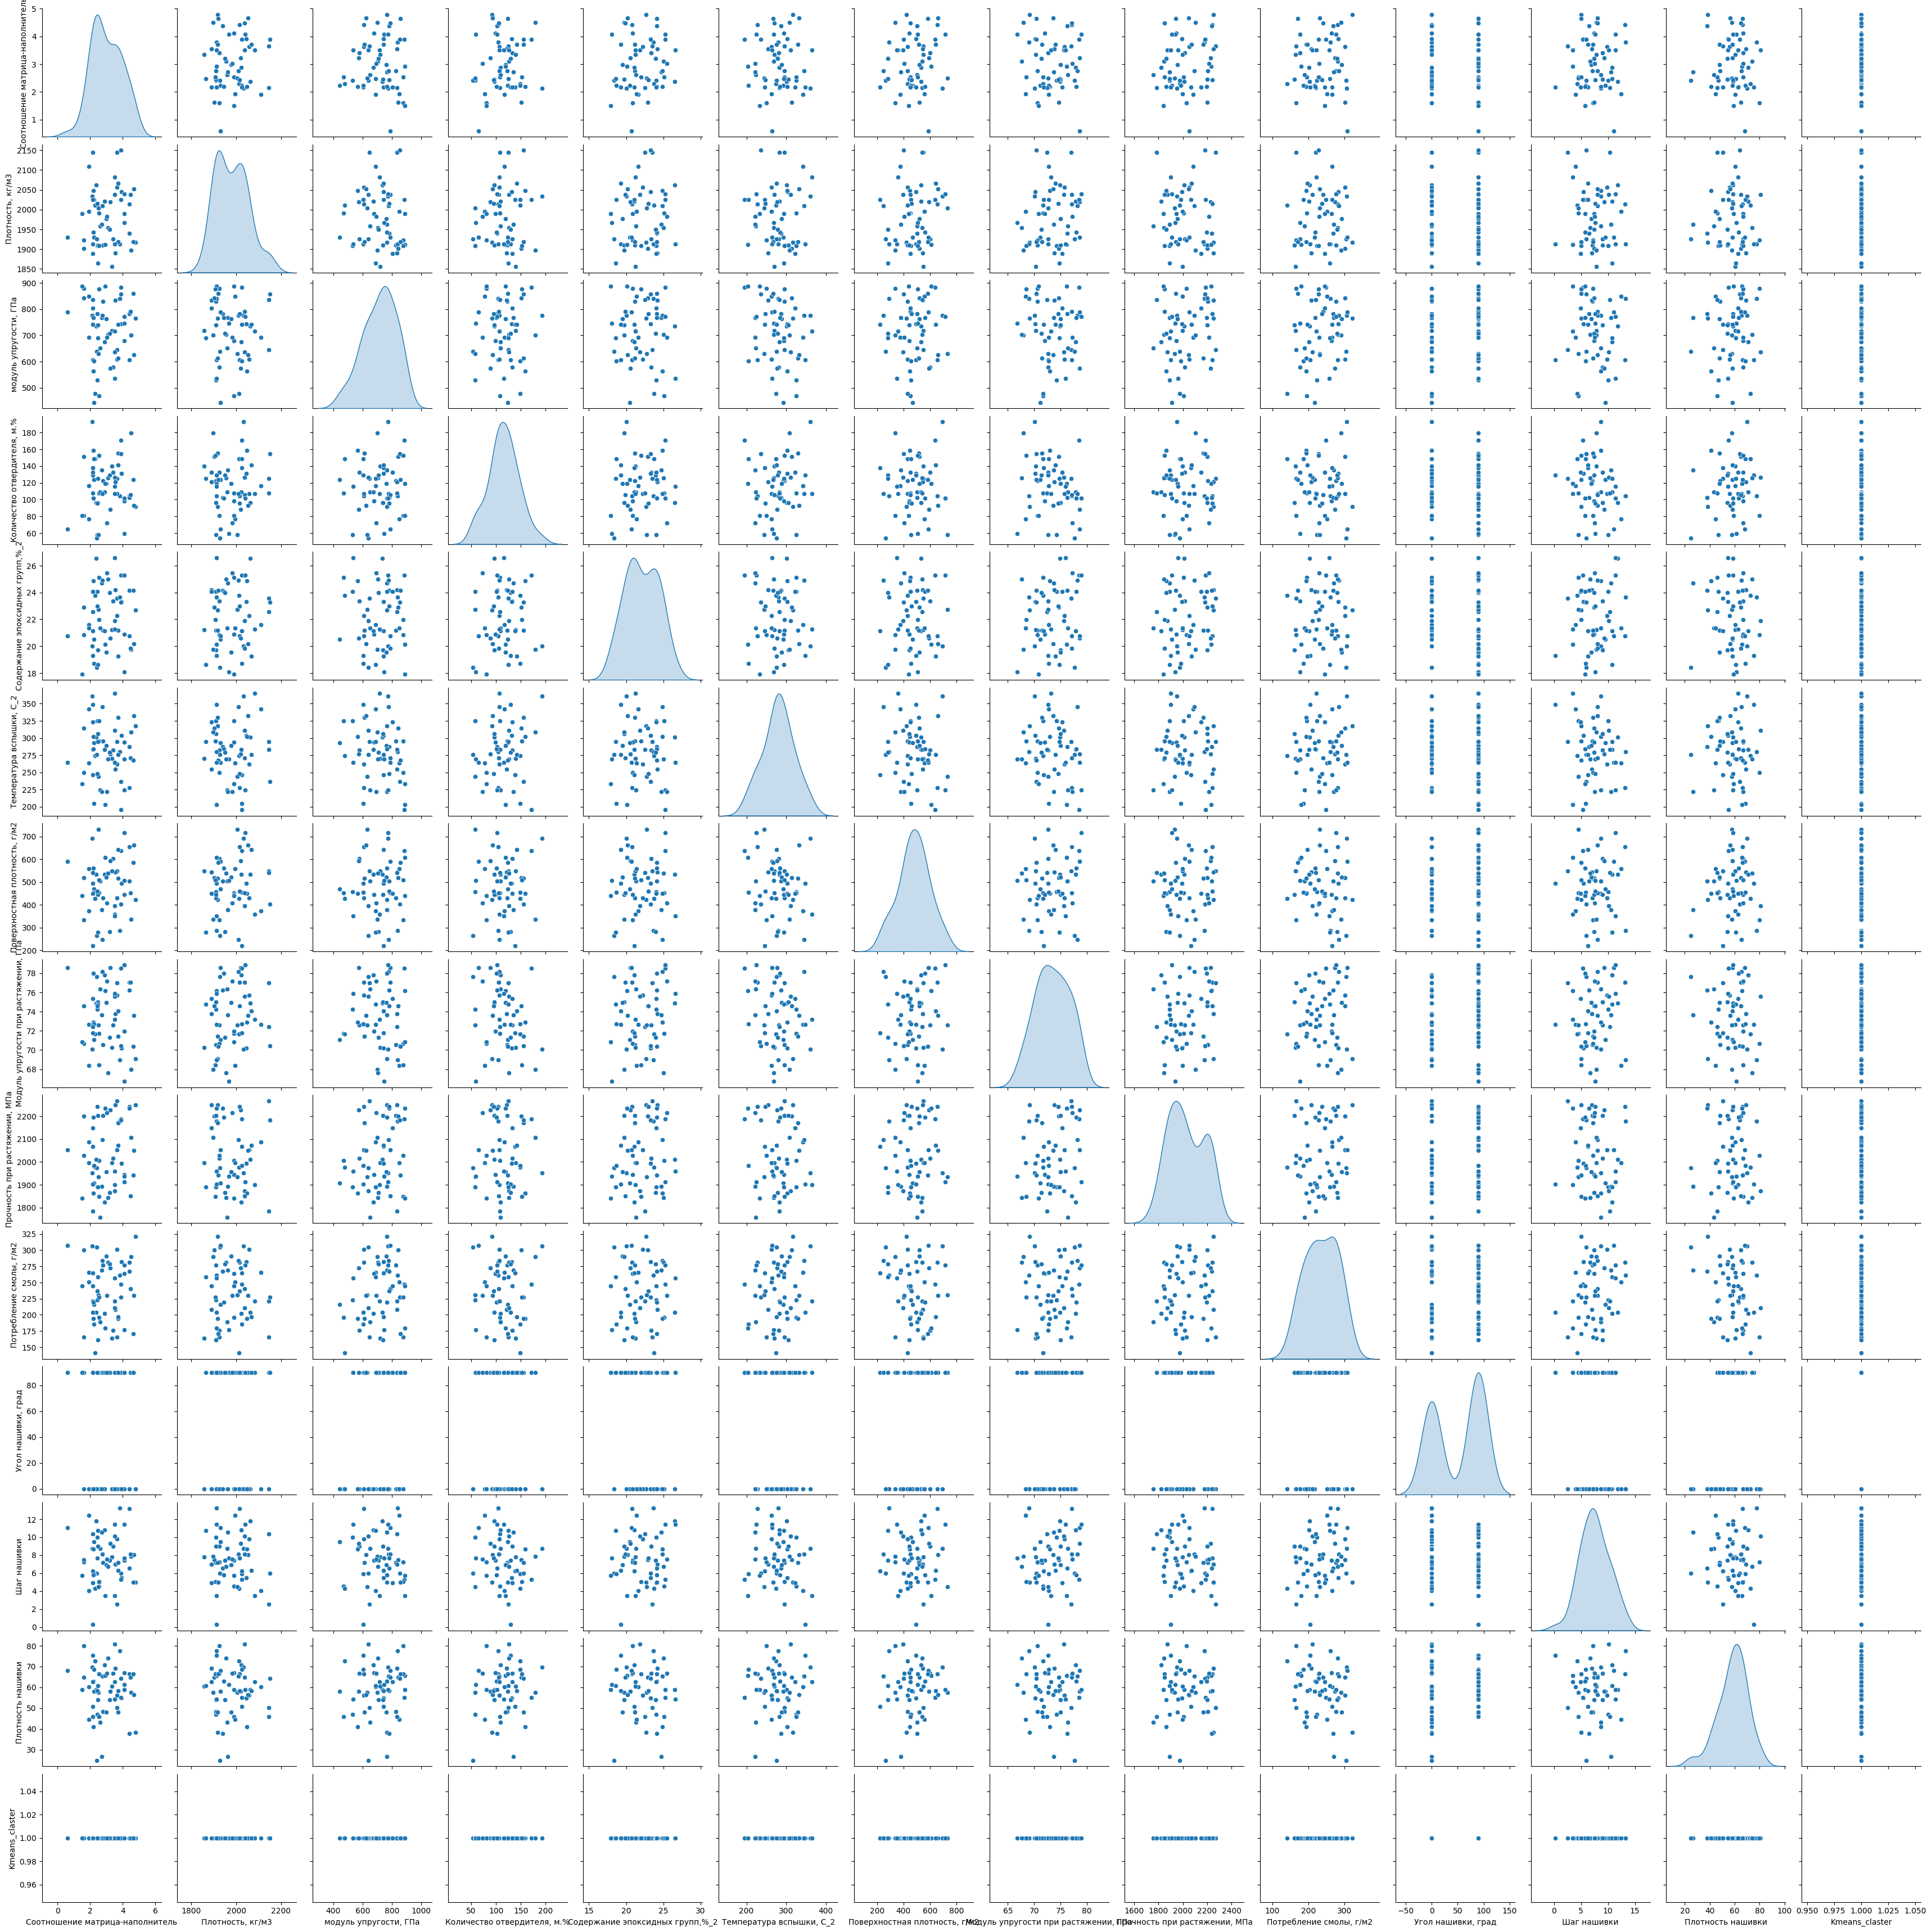

In [27]:
sns.pairplot(ds_by_clusters[0], diag_kind='kde')

<Axes: >

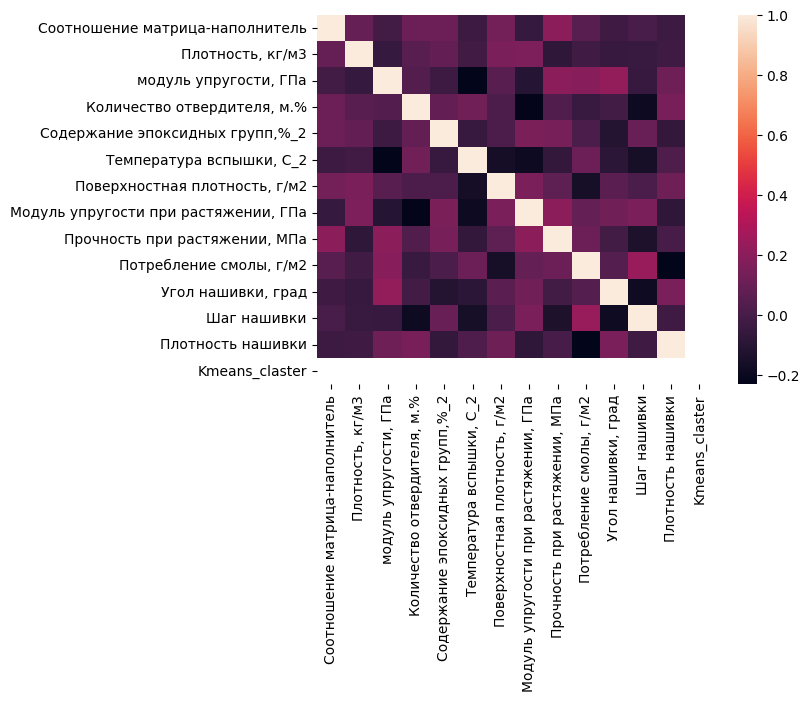

In [28]:
sns.heatmap(ds_clasters_cor)

## Как мы видим выше, на графиках начинает прослеживаться линейная зависимость параетров

In [29]:
columns = ds_by_clusters[0].columns.tolist()

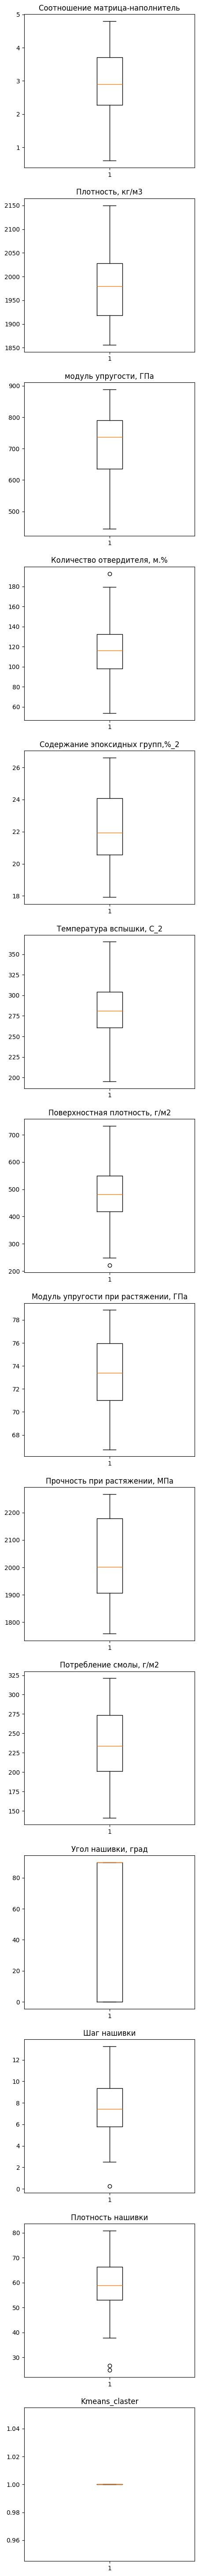

In [30]:
fig, axis = plt.subplots(nrows=len(columns), ncols=1, figsize=(5, 75) )
# fig, axis = plt.subplots(nrows=4, ncols=4, figsize=(75, 55) )
x = 0
# y = 0

for column in columns:
    # if x >= 4:
    #     x = 0
    #     y += 1
    # axis[y, x].boxplot(df[column])
    # axis[y, x].set_title(column)
    axis[x].boxplot(ds_by_clusters[0][column])
    axis[x].set_title(column)
    x+=1
plt.show()

In [31]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Model # basic class for specifying and training a neural network
from tensorflow.keras.layers import Input, Dense # базовый класс для задания и обучения нейронной сети

from tensorflow.keras.optimizers import SGD

In [33]:
df_ = ds_by_clusters[0].drop('Kmeans_claster', axis=1)
df_.shape

(60, 13)

In [34]:
scaller = MinMaxScaler()

y = df_['Соотношение матрица-наполнитель']
# y = output_scaller.fit_transform(y)
X = df_.drop('Соотношение матрица-наполнитель', axis=1)
# X = df_IQR
columns = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
col = df.columns.tolist()
col.remove('Модуль упругости при растяжении, ГПа')

# Add normalizer layer
normalizer = tf.keras.layers.Normalization(axis=-1, input_shape=[len(columns),])
# Предобучение
normalizer.adapt(np.array(X_train))
print(normalizer.mean.numpy())



[[0.42074615 0.64017296 0.43115315 0.5517641  0.5154973  0.4964641
  0.51627594 0.48744428 0.5442463  0.5833333  0.53848594 0.6067368 ]]


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                416       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 449 (1.75 KB)
Trainable params: 449 (1.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None




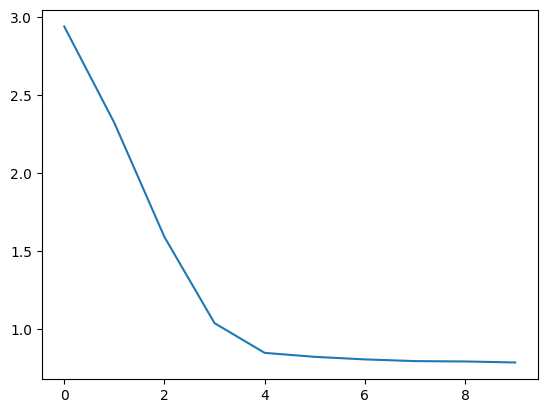

1/1 [==============================] - 0s 90ms/step


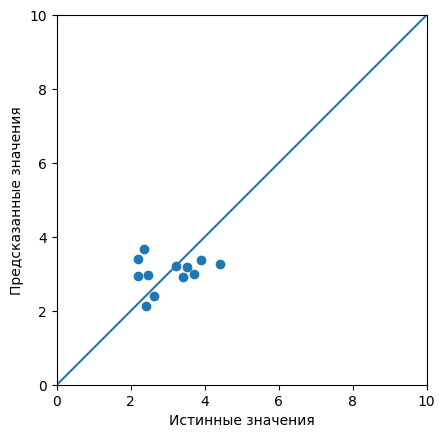

MSE: 0.5405986981659746
MAE: 0.6200437435406329

REAL
MEAN VALUE: 3.0315326102623246
MIN VALUE: 2.18509276493258
MAX VALUE: 4.41416119685704

PREDICT
MEAN VALUE: 3.0361077785491943
MIN VALUE: 2.1225171089172363
MAX VALUE: 3.6588807106018066


In [35]:
# model = Sequential([normalizer])
model = Sequential()
model.add(tf.keras.layers.Input(len(columns)))
# model.add(Dense(32, activation='elu')) # the best variant
# model.add(Dense(180, activation='elu')) # the best variant
# model.add(Dense(160, activation='relu6')) # the best variant
model.add(Dense(32, activation='relu6')) # the best variant
# model.add(Dense(16, activation='relu6')) # the best variant
# model.add(Dense(8, activation='relu6')) # the best variant
model.add(Dense(1, ))

# PREDICT
# MEAN VALUE: 2.9149367809295654
# MIN VALUE: 0.1824452131986618
# MAX VALUE: 5.307587146759033

# BEST optimizers
# Adam, Lion, Nadam, RMSprop

# Ftrl gives one number in output



# * mean_absolute_percentage_error 
# * huber_loss
# * log_cosh
# * mean_absolute_percentage_error
# * mean_absolute_error
# * mean_squared_error
# * mean_squared_logarithmic_error

# Compile

model.compile(loss='mse',              
              # optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              # optimizer='adam',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['mae'])
              # metrics=['mse'])

print(model.summary()) # Выводим структуру сети
# Train NN
history=model.fit(X_train,
                  y_train,
                  batch_size=1,
                  epochs=10,
                  # validation_data=(X_test, y_test),
                  # Calculate validation results on 20% of the training data.
                  # validation_split = 0.2)
                  # Подавляем вывол протоколов обучения.
                  verbose=0,
                  # Используем 20% обучающих данных для валидации.
                  validation_split = 0.1)

plt.plot(history.history['mae'])
# plt.plot(history.history['hindle'])
plt.show()

test_predictions = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.show()

print(f'MSE: {mean_squared_error(y_test, test_predictions)}')
print(f'MAE: {mean_absolute_error(y_test, test_predictions)}')

print(f'''
REAL
MEAN VALUE: {np.mean(y_test)}
MIN VALUE: {np.min(y_test)}
MAX VALUE: {np.max(y_test)}''')

print(f'''
PREDICT
MEAN VALUE: {np.mean(test_predictions)}
MIN VALUE: {np.min(test_predictions)}
MAX VALUE: {np.max(test_predictions)}''')

## Так как в результате кластеризации на 20 кластеров выборка получается крайне малой то результат получается неудовлетворительным

# Попробуем разбить данные на кластеры другим алгоритмом

## DBSCAN

In [36]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [37]:
df_s = StandardScaler().fit_transform(df)

In [38]:
df_s.shape

(1000, 14)

In [39]:
dbcluster = DBSCAN(eps=0.8, min_samples=2).fit(df_s)

In [40]:
dbcluster_cl = dbcluster.labels_
dbcluster_cl

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

## Вывод: DBSCAN не может разделить эти данные на кластеры

## TSNE

In [41]:
from sklearn.manifold import TSNE

In [42]:
df_2 = df.loc[:, ['Плотность, кг/м3', 'Количество отвердителя, м.%', 'Поверхностная плотность, г/м2', 'Прочность при растяжении, МПа']]

In [43]:
tsne_clusters_number = TSNE(n_components=2, init='random').fit_transform(df)
tsne_clusters_number

array([[ -8.199788 ,  14.2831   ],
       [-29.384861 , -17.778332 ],
       [ -9.893837 ,  -3.2526627],
       ...,
       [ -3.0081491, -16.271782 ],
       [ 22.394154 ,  16.214268 ],
       [ -8.278106 , -15.80694  ]], dtype=float32)

C:\Users\Danil\AppData\Local\Temp\ipykernel_12016\2707252533.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(tsne_clusters_number[:, 0], tsne_clusters_number[:, 1], cmap=plt.cm.Spectral)


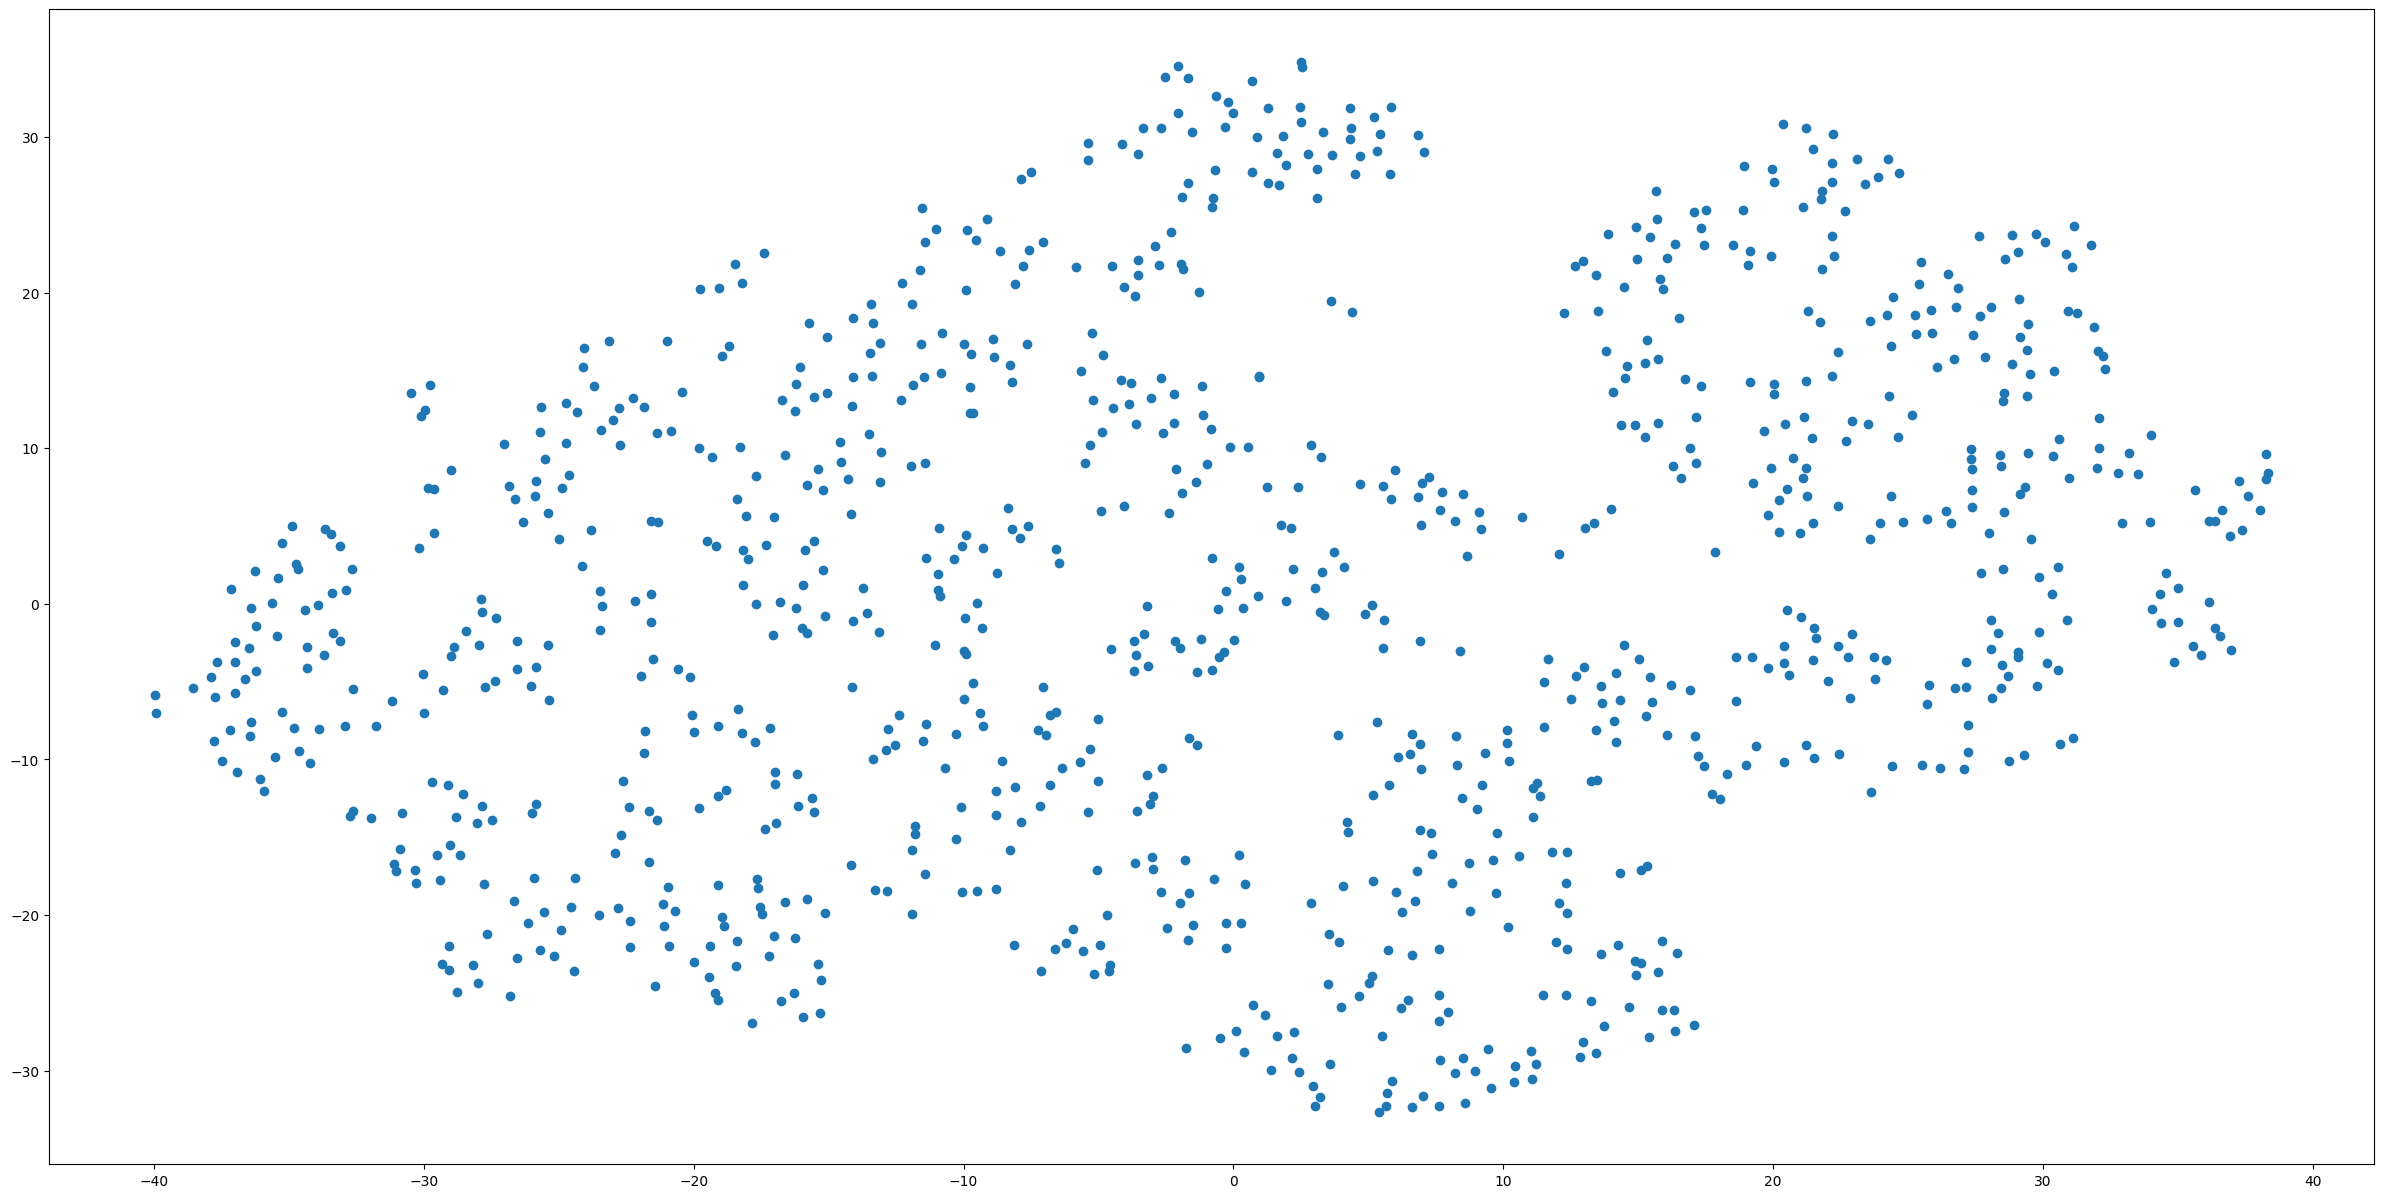

In [44]:
fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot()
ax.scatter(tsne_clusters_number[:, 0], tsne_clusters_number[:, 1], cmap=plt.cm.Spectral)
# ax.set_title("%s: (%.2g sec)" % (label, t1 - t0))
ax.axis('tight')
plt.show()

In [45]:
tsne_clusters_number.shape

(1000, 2)

### Попробуем разбить на кластеры 2у мерное представление ДС

#### Воспользуемся методом логтя K-Means

In [46]:
distortions_2 = []
for i in range(1, 20):
    kmeans = KMeans(
        n_clusters=i, # На сколько кластеров поделить наш ДС
        init='random', # Начальная инициализация центров кластеров
        n_init=10, # Начальное колиечтво этих точек (центров класстеров)
        max_iter=300, # 
        tol=1e-04 # Величина изменения при сдвиге
    )
    kmeans_prediction_2 = kmeans.fit_predict(tsne_clusters_number)
    # plt.title(f"Clasterisations result with {i} clusters")
    # Draw our points
    # plt.scatter(df[:, 0], df[:, 1], c=kmeans_prediction)
    # Draw our clusters centers
    # plt.scatter(*kmeans.cluster_centers_.T, # Вызываем наши центыр и транспонируем нашу матрицу
    #             marker='*', 
    #             s=200, 
    #             color='r')
    # plt.show()
    distortions_2.append(kmeans.inertia_)

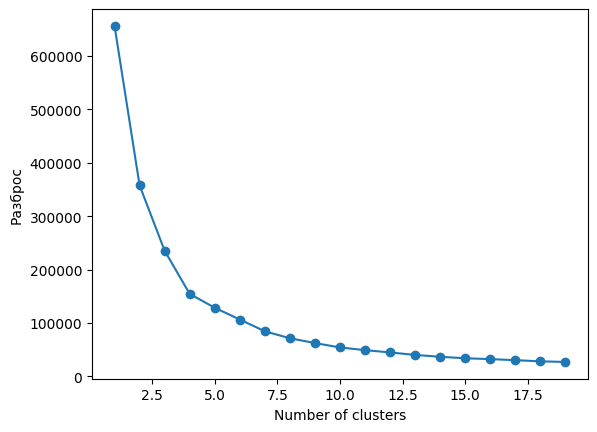

In [47]:
plt.plot(range(1,20), distortions_2, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Разброс')
plt.show()

In [48]:
kmeans = KMeans(
    n_clusters=10, # На сколько кластеров поделить наш ДС
    init='random', # Начальная инициализация центров кластеров
    n_init=5, # Начальное колиечтво этих точек (центров класстеров)
    max_iter=300, # 
    tol=1e-04 # Величина изменения при сдвиге
)
kmeans_prediction_2 = kmeans.fit_predict(tsne_clusters_number)
kmeans_prediction_2

array([3, 2, 4, 6, 2, 1, 7, 3, 4, 7, 3, 5, 2, 8, 8, 3, 3, 4, 5, 6, 1, 0,
       8, 2, 3, 6, 8, 0, 0, 6, 3, 6, 7, 3, 5, 4, 9, 0, 6, 5, 1, 2, 0, 1,
       7, 5, 6, 8, 4, 8, 5, 9, 7, 5, 0, 6, 0, 8, 3, 9, 5, 0, 3, 3, 5, 0,
       8, 8, 4, 3, 0, 0, 5, 0, 5, 5, 2, 7, 0, 6, 1, 7, 3, 2, 1, 5, 5, 3,
       6, 6, 8, 5, 1, 5, 6, 6, 8, 0, 0, 0, 7, 7, 6, 8, 8, 3, 6, 8, 4, 7,
       3, 7, 3, 0, 8, 3, 3, 1, 1, 9, 1, 0, 9, 0, 4, 5, 8, 1, 1, 9, 8, 8,
       8, 8, 4, 6, 3, 9, 0, 1, 1, 7, 9, 3, 4, 3, 5, 3, 1, 2, 7, 3, 8, 7,
       7, 8, 4, 0, 3, 9, 5, 3, 2, 4, 8, 2, 5, 3, 3, 3, 2, 0, 3, 3, 7, 7,
       2, 3, 5, 5, 9, 5, 9, 8, 7, 5, 2, 6, 0, 1, 3, 0, 9, 8, 3, 3, 5, 4,
       8, 5, 2, 0, 6, 7, 8, 7, 4, 0, 8, 3, 0, 2, 8, 9, 9, 1, 1, 3, 5, 1,
       1, 0, 7, 1, 1, 0, 2, 7, 7, 7, 1, 2, 0, 0, 5, 5, 8, 2, 7, 0, 8, 9,
       3, 5, 4, 9, 7, 8, 6, 1, 8, 4, 9, 5, 5, 9, 4, 7, 4, 2, 7, 8, 0, 4,
       9, 1, 8, 0, 3, 1, 4, 0, 7, 9, 5, 4, 6, 8, 4, 7, 3, 5, 7, 1, 8, 0,
       7, 5, 4, 9, 8, 4, 3, 4, 3, 8, 0, 3, 8, 3, 8,

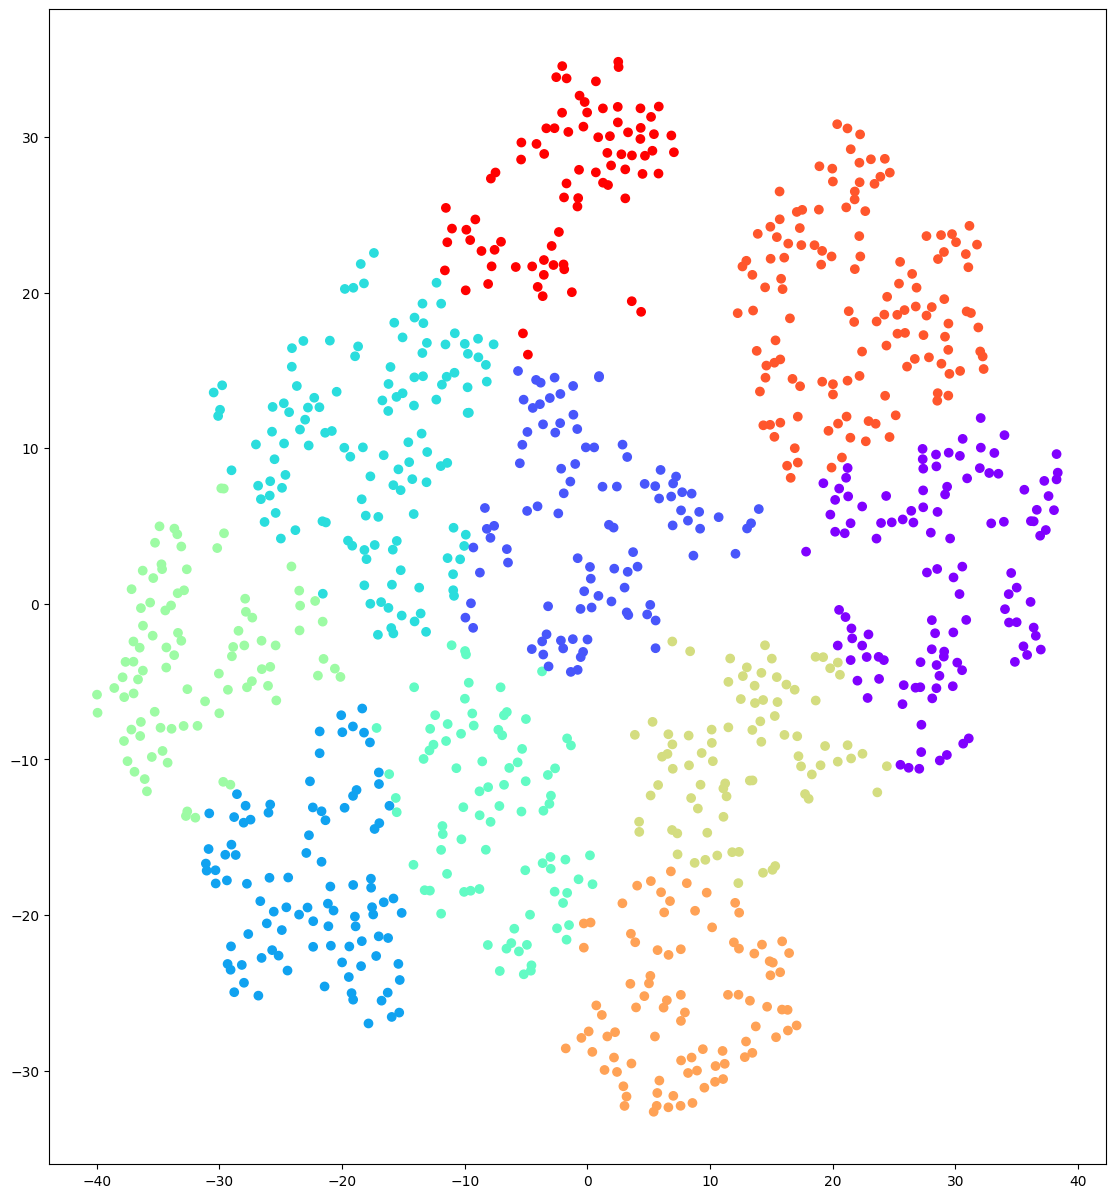

In [49]:
fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot(121)
plt.scatter(tsne_clusters_number[:, 0], tsne_clusters_number[:, 1], c=kmeans.labels_, marker='o', cmap='rainbow')

In [50]:
kmeans.labels_.shape

(1000,)

## После визуализации видим в целом адекватное разбиение на кластеры, попробуем работать с ним

In [51]:
df['Kmeans_claster'] = kmeans.labels_

In [52]:
ds_by_clusters = []
for n in range(0,10):
    one_clusster = df.loc[(df['Kmeans_claster'] == n), ]
    ds_by_clusters.append(one_clusster)

In [53]:
len(list(range(1,10)))

9

In [54]:
columns = ds_by_clusters[0].columns.tolist()
columns

['Соотношение матрица-наполнитель',
 'Плотность, кг/м3',
 'модуль упругости, ГПа',
 'Количество отвердителя, м.%',
 'Содержание эпоксидных групп,%_2',
 'Температура вспышки, С_2',
 'Поверхностная плотность, г/м2',
 'Модуль упругости при растяжении, ГПа',
 'Прочность при растяжении, МПа',
 'Потребление смолы, г/м2',
 'Угол нашивки, град',
 'Шаг нашивки',
 'Плотность нашивки',
 'Kmeans_claster']

In [55]:
ds_by_clusters[0].shape

(116, 14)

In [56]:
ds_1 = ds_by_clusters[0]
ds_1.corrwith(ds_1['Соотношение матрица-наполнитель'], numeric_only=True).sort_values()

C:\Users\Danil\PycharmProjects\GITHUB\Composite_materials\venv\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Danil\PycharmProjects\GITHUB\Composite_materials\venv\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Плотность, кг/м3                       -0.247321
Модуль упругости при растяжении, ГПа   -0.118875
Плотность нашивки                      -0.090209
Содержание эпоксидных групп,%_2        -0.078674
Количество отвердителя, м.%            -0.054173
Угол нашивки, град                     -0.015277
Потребление смолы, г/м2                 0.004312
Поверхностная плотность, г/м2           0.040724
Прочность при растяжении, МПа           0.056413
Температура вспышки, С_2                0.072408
модуль упругости, ГПа                   0.088995
Шаг нашивки                             0.109312
Соотношение матрица-наполнитель         1.000000
Kmeans_claster                               NaN
dtype: float64

In [57]:
ds_1_corr = ds_1.corr()
ds_1_corr

Соотношение матрица-наполнитель  \
Соотношение матрица-наполнитель                              1.000000   
Плотность, кг/м3                                            -0.247321   
модуль упругости, ГПа                                        0.088995   
Количество отвердителя, м.%                                 -0.054173   
Содержание эпоксидных групп,%_2                             -0.078674   
Температура вспышки, С_2                                     0.072408   
Поверхностная плотность, г/м2                                0.040724   
Модуль упругости при растяжении, ГПа                        -0.118875   
Прочность при растяжении, МПа                                0.056413   
Потребление смолы, г/м2                                      0.004312   
Угол нашивки, град                                          -0.015277   
Шаг нашивки                                                  0.109312   
Плотность нашивки                                           -0.090209   
Kmeans_claster                                                    NaN   

                                      Плотность, кг/м3  модуль упругости, ГПа  \
Соотношение матрица-наполнитель              -0.247321               0.088995   
Плотность, кг/м3                              1.000000              -0.220815   
модуль упругости, ГПа                        -0.220815               1.000000   
Количество отвердителя, м.%                   0.005691               0.039057   
Содержание эпоксидных групп,%_2               0.077041               0.050254   
Температура вспышки, С_2                      0.017243              -0.210541   
Поверхностная плотность, г/м2                 0.158114              -0.279329   
Модуль упругости при растяжении, ГПа          0.085193              -0.093265   
Прочность при растяжении, МПа                -0.219786               0.070724   
Потребление смолы, г/м2                       0.043714              -0.078292   
Угол нашивки, град                           -0.097276               0.168898   
Шаг нашивки                                   0.009190              -0.032719   
Плотность нашивки                             0.044722               0.065559   
Kmeans_claster                                     NaN                    NaN   

                                      Количество отвердителя, м.%  \
Соотношение матрица-наполнитель                         -0.054173   
Плотность, кг/м3                                         0.005691   
модуль упругости, ГПа                                    0.039057   
Количество отвердителя, м.%                              1.000000   
Содержание эпоксидных групп,%_2                          0.051271   
Температура вспышки, С_2                                 0.095510   
Поверхностная плотность, г/м2                           -0.033407   
Модуль упругости при растяжении, ГПа                    -0.218153   
Прочность при растяжении, МПа                           -0.002164   
Потребление смолы, г/м2                                  0.124321   
Угол нашивки, град                                       0.108587   
Шаг нашивки                                             -0.005238   
Плотность нашивки                                        0.124569   
Kmeans_claster                                                NaN   

                                      Содержание эпоксидных групп,%_2  \
Соотношение матрица-наполнитель                             -0.078674   
Плотность, кг/м3                                             0.077041   
модуль упругости, ГПа                                        0.050254   
Количество отвердителя, м.%                                  0.051271   
Содержание эпоксидных групп,%_2                              1.000000   
Температура вспышки, С_2                                     0.102029   
Поверхностная плотность, г/м2                                0.005908   
Модуль упругости при растяжении, ГПа                         0.009089   
Прочность при растяжении, МПа    

<Axes: >

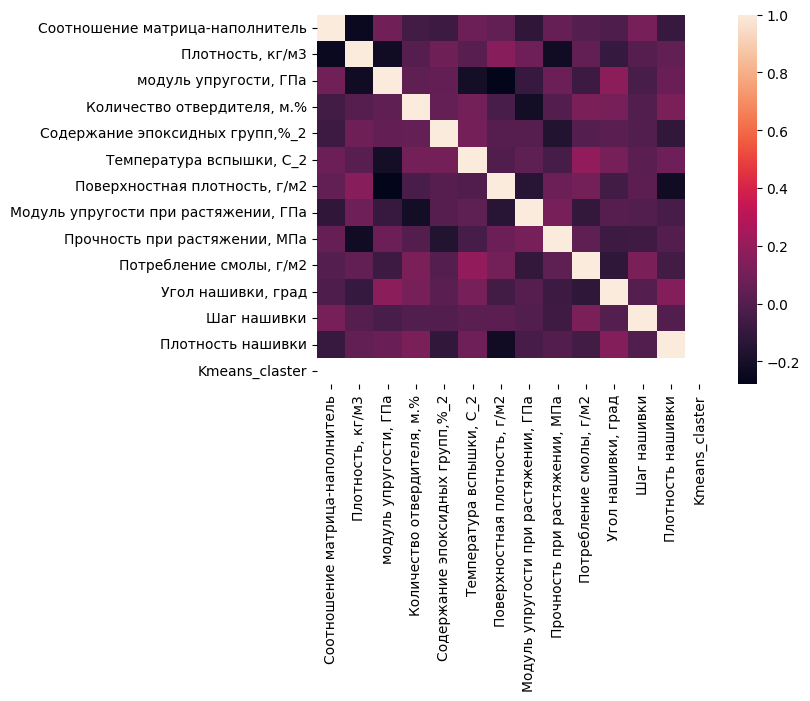

In [58]:
sns.heatmap(ds_1_corr)

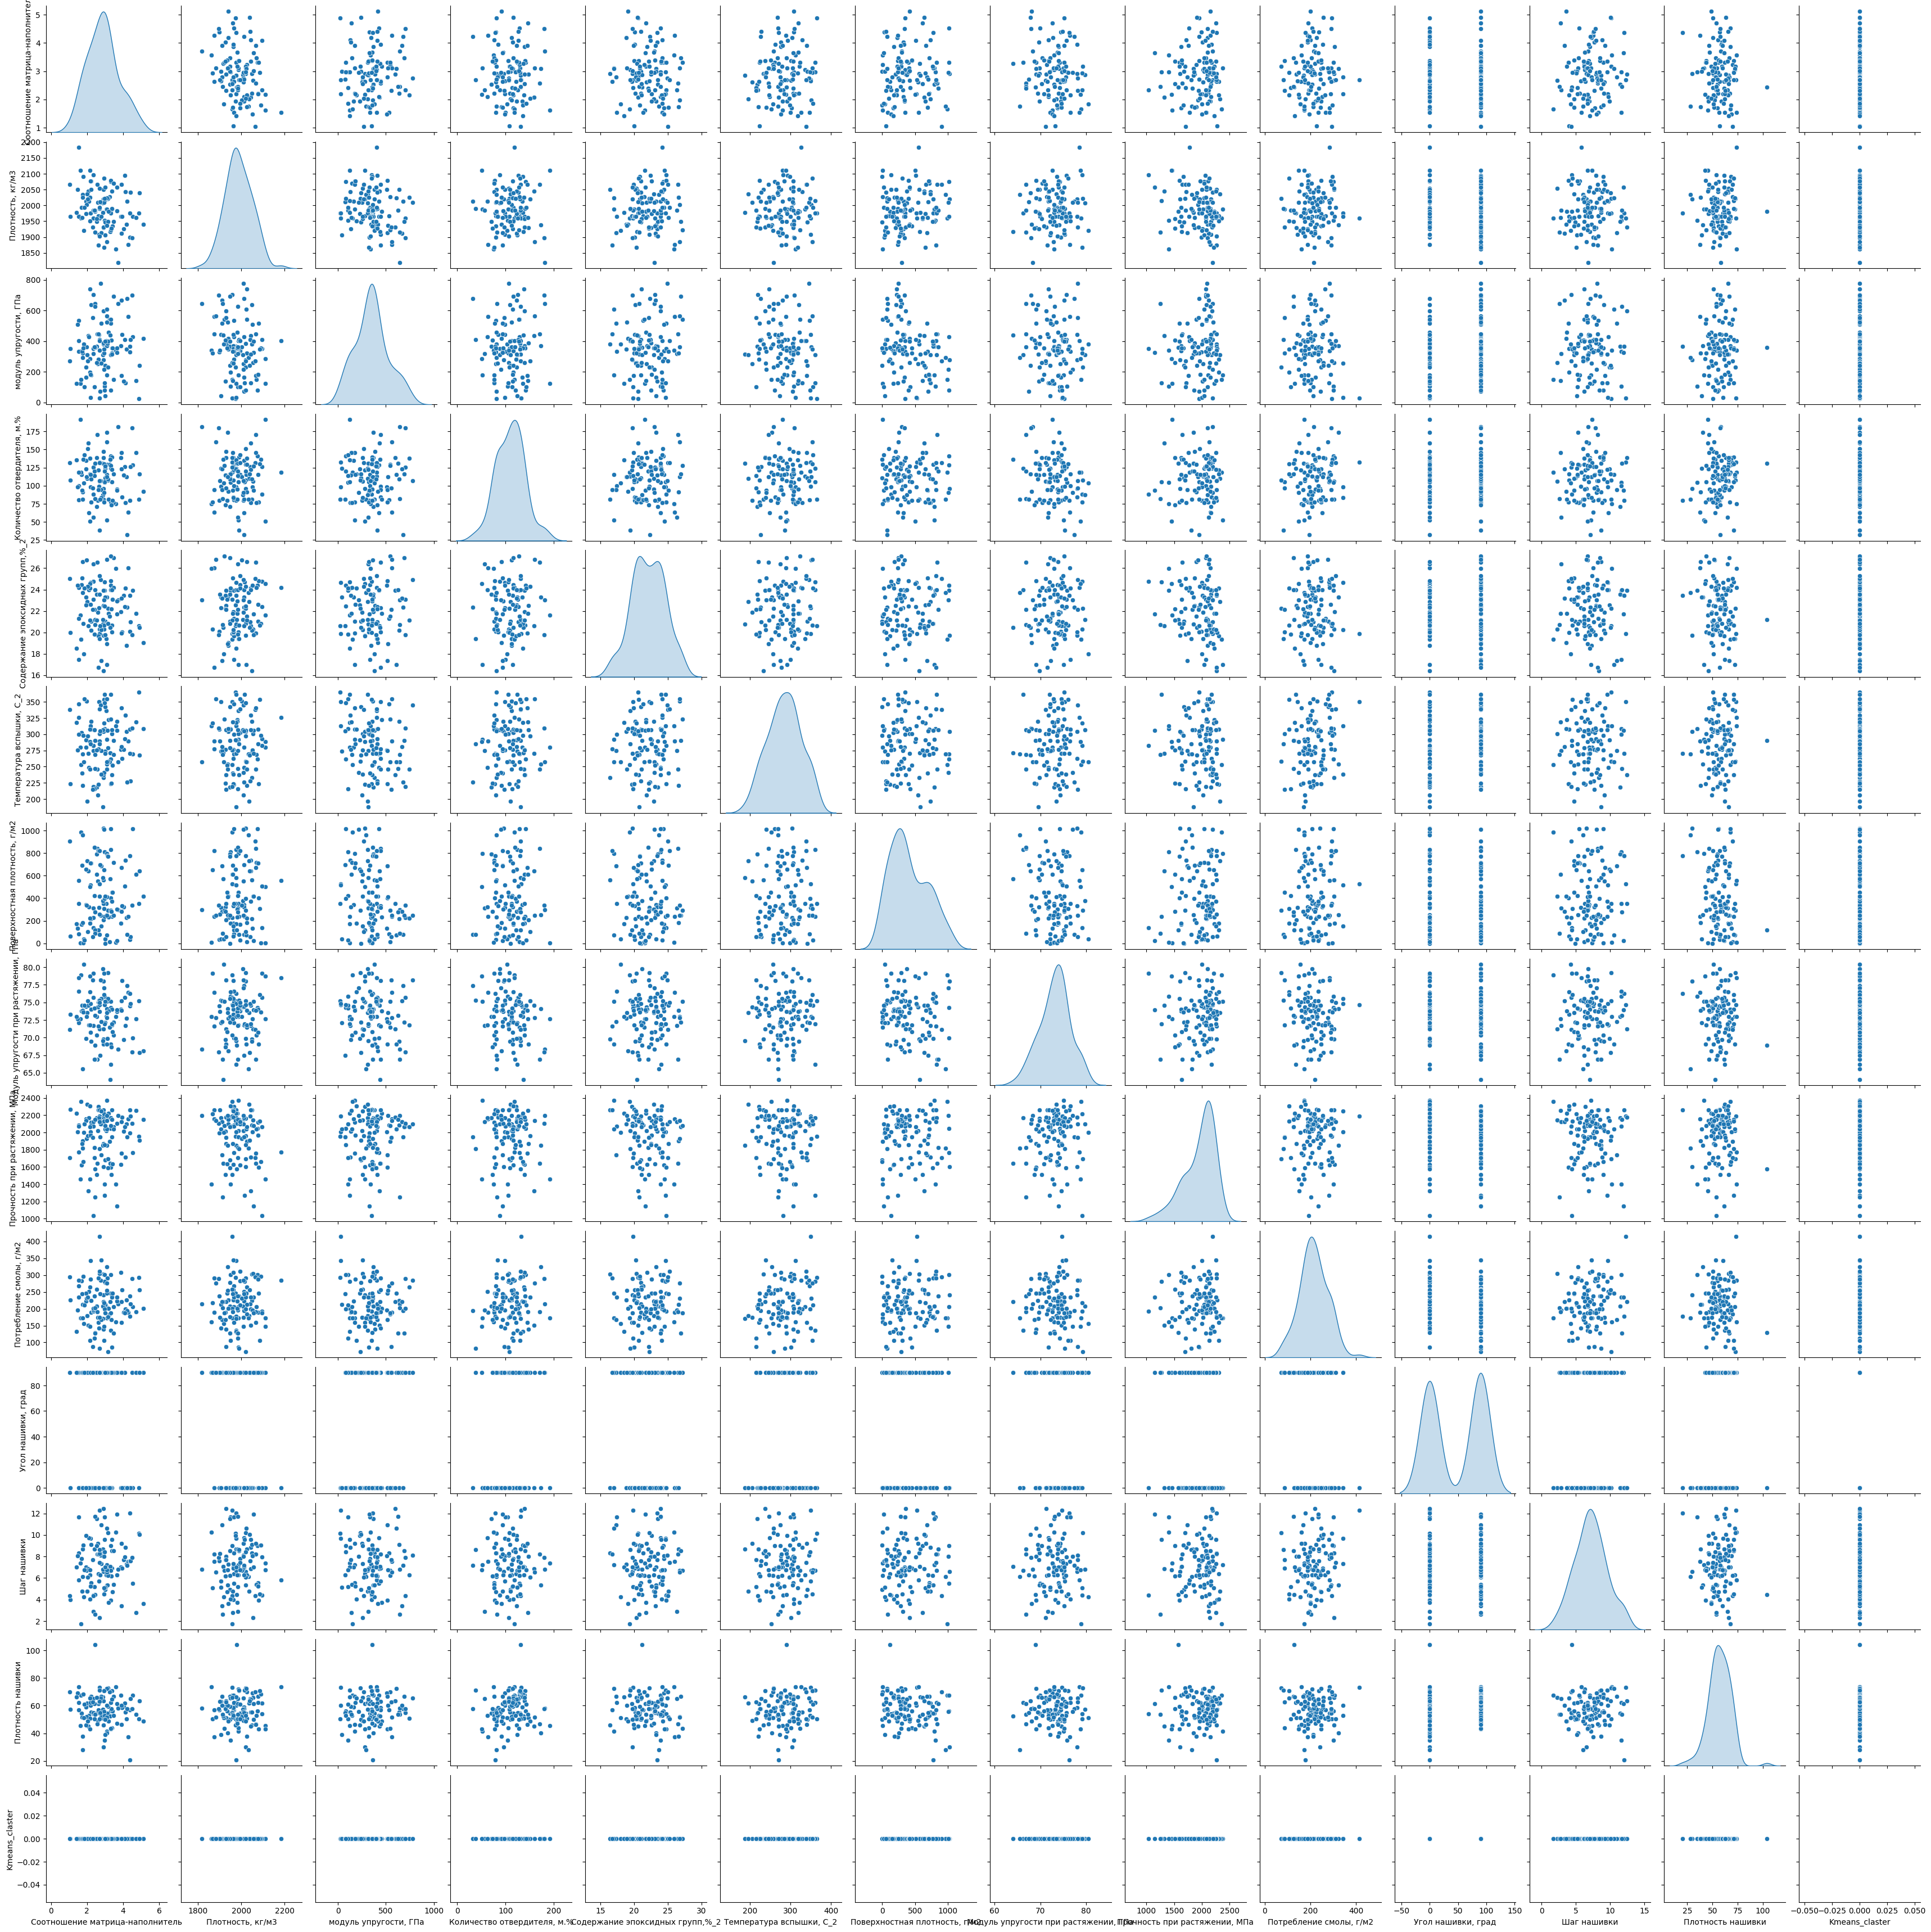

In [59]:
sns.pairplot(ds_1, diag_kind='kde')

## Поработаем с выбросами через РСА
Но пока не охото ...

## Попробуем применить РСА для сжатия

### Подбор параметров для РСА

#### Параметры которые нам нужно предсказать

In [60]:
ds_1_corr['Соотношение матрица-наполнитель'].sort_values()

Плотность, кг/м3                       -0.247321
Модуль упругости при растяжении, ГПа   -0.118875
Плотность нашивки                      -0.090209
Содержание эпоксидных групп,%_2        -0.078674
Количество отвердителя, м.%            -0.054173
Угол нашивки, град                     -0.015277
Потребление смолы, г/м2                 0.004312
Поверхностная плотность, г/м2           0.040724
Прочность при растяжении, МПа           0.056413
Температура вспышки, С_2                0.072408
модуль упругости, ГПа                   0.088995
Шаг нашивки                             0.109312
Соотношение матрица-наполнитель         1.000000
Kmeans_claster                               NaN
Name: Соотношение матрица-наполнитель, dtype: float64

In [61]:
ds_1_corr['Модуль упругости при растяжении, ГПа'].sort_values()

Количество отвердителя, м.%            -0.218153
Поверхностная плотность, г/м2          -0.142088
Соотношение матрица-наполнитель        -0.118875
Потребление смолы, г/м2                -0.107851
модуль упругости, ГПа                  -0.093265
Плотность нашивки                      -0.038262
Шаг нашивки                            -0.006243
Угол нашивки, град                      0.007644
Содержание эпоксидных групп,%_2         0.009089
Температура вспышки, С_2                0.034169
Плотность, кг/м3                        0.085193
Прочность при растяжении, МПа           0.107822
Модуль упругости при растяжении, ГПа    1.000000
Kmeans_claster                               NaN
Name: Модуль упругости при растяжении, ГПа, dtype: float64

In [62]:
ds_1_corr['Прочность при растяжении, МПа'].sort_values()

Плотность, кг/м3                       -0.219786
Содержание эпоксидных групп,%_2        -0.162956
Угол нашивки, град                     -0.076645
Шаг нашивки                            -0.065863
Температура вспышки, С_2               -0.044294
Плотность нашивки                      -0.003982
Количество отвердителя, м.%            -0.002164
Потребление смолы, г/м2                 0.031984
Соотношение матрица-наполнитель         0.056413
модуль упругости, ГПа                   0.070724
Поверхностная плотность, г/м2           0.072027
Модуль упругости при растяжении, ГПа    0.107822
Прочность при растяжении, МПа           1.000000
Kmeans_claster                               NaN
Name: Прочность при растяжении, МПа, dtype: float64

#### Выборочный анализ остального

In [63]:
ds_1_corr['модуль упругости, ГПа'].sort_values()

Поверхностная плотность, г/м2          -0.279329
Плотность, кг/м3                       -0.220815
Температура вспышки, С_2               -0.210541
Модуль упругости при растяжении, ГПа   -0.093265
Потребление смолы, г/м2                -0.078292
Шаг нашивки                            -0.032719
Количество отвердителя, м.%             0.039057
Содержание эпоксидных групп,%_2         0.050254
Плотность нашивки                       0.065559
Прочность при растяжении, МПа           0.070724
Соотношение матрица-наполнитель         0.088995
Угол нашивки, град                      0.168898
модуль упругости, ГПа                   1.000000
Kmeans_claster                               NaN
Name: модуль упругости, ГПа, dtype: float64

In [64]:
ds_1_corr['Плотность нашивки'].sort_values()

Поверхностная плотность, г/м2          -0.221467
Содержание эпоксидных групп,%_2        -0.111254
Соотношение матрица-наполнитель        -0.090209
Потребление смолы, г/м2                -0.052641
Модуль упругости при растяжении, ГПа   -0.038262
Шаг нашивки                            -0.005886
Прочность при растяжении, МПа          -0.003982
Плотность, кг/м3                        0.044722
модуль упругости, ГПа                   0.065559
Температура вспышки, С_2                0.081432
Количество отвердителя, м.%             0.124569
Угол нашивки, град                      0.145470
Плотность нашивки                       1.000000
Kmeans_claster                               NaN
Name: Плотность нашивки, dtype: float64

In [65]:
ds_1_corr['Шаг нашивки'].sort_values()

Прочность при растяжении, МПа          -0.065863
модуль упругости, ГПа                  -0.032719
Содержание эпоксидных групп,%_2        -0.007044
Модуль упругости при растяжении, ГПа   -0.006243
Плотность нашивки                      -0.005886
Количество отвердителя, м.%            -0.005238
Угол нашивки, град                      0.005331
Плотность, кг/м3                        0.009190
Температура вспышки, С_2                0.024852
Поверхностная плотность, г/м2           0.029159
Соотношение матрица-наполнитель         0.109312
Потребление смолы, г/м2                 0.123112
Шаг нашивки                             1.000000
Kmeans_claster                               NaN
Name: Шаг нашивки, dtype: float64

In [66]:
ds_1_corr['Угол нашивки, град'].sort_values()

Потребление смолы, г/м2                -0.122418
Плотность, кг/м3                       -0.097276
Прочность при растяжении, МПа          -0.076645
Поверхностная плотность, г/м2          -0.049999
Соотношение матрица-наполнитель        -0.015277
Шаг нашивки                             0.005331
Модуль упругости при растяжении, ГПа    0.007644
Содержание эпоксидных групп,%_2         0.024845
Количество отвердителя, м.%             0.108587
Температура вспышки, С_2                0.109191
Плотность нашивки                       0.145470
модуль упругости, ГПа                   0.168898
Угол нашивки, град                      1.000000
Kmeans_claster                               NaN
Name: Угол нашивки, град, dtype: float64

In [67]:
ds_1_corr['Температура вспышки, С_2'].sort_values()

модуль упругости, ГПа                  -0.210541
Прочность при растяжении, МПа          -0.044294
Поверхностная плотность, г/м2          -0.011188
Плотность, кг/м3                        0.017243
Шаг нашивки                             0.024852
Модуль упругости при растяжении, ГПа    0.034169
Соотношение матрица-наполнитель         0.072408
Плотность нашивки                       0.081432
Количество отвердителя, м.%             0.095510
Содержание эпоксидных групп,%_2         0.102029
Угол нашивки, град                      0.109191
Потребление смолы, г/м2                 0.186551
Температура вспышки, С_2                1.000000
Kmeans_claster                               NaN
Name: Температура вспышки, С_2, dtype: float64

In [68]:
ds_1_corr['Содержание эпоксидных групп,%_2'].sort_values()

Прочность при растяжении, МПа          -0.162956
Плотность нашивки                      -0.111254
Соотношение матрица-наполнитель        -0.078674
Шаг нашивки                            -0.007044
Потребление смолы, г/м2                 0.000592
Поверхностная плотность, г/м2           0.005908
Модуль упругости при растяжении, ГПа    0.009089
Угол нашивки, град                      0.024845
модуль упругости, ГПа                   0.050254
Количество отвердителя, м.%             0.051271
Плотность, кг/м3                        0.077041
Температура вспышки, С_2                0.102029
Содержание эпоксидных групп,%_2         1.000000
Kmeans_claster                               NaN
Name: Содержание эпоксидных групп,%_2, dtype: float64

### Попробуем снизить размерность
В целом, я выделил следующие группы:
* ['Плотность нашивки', 'Шаг нашивки', 'Угол нашивки, град']
* ['Содержание эпоксидных групп,%_2', 'Потребление смолы, г/м2']

#### Сначала для 'Соотношение матрица-наполнитель'

In [69]:
from sklearn.decomposition import PCA

In [70]:
features_1 = ['Плотность нашивки', 'Шаг нашивки', 'Угол нашивки, град']
features_2 = ['Содержание эпоксидных групп,%_2', 'Потребление смолы, г/м2']
features_3 = features_1 + features_2

In [71]:
X = df.copy()
y = X.pop("Соотношение матрица-наполнитель")
X = X.loc[:, features_2]

# Стандартизация
X_stand = (X - X.mean(axis=0)) / X.std(axis=0)

#### Метод локтя для выяснения оптимального набора копонент

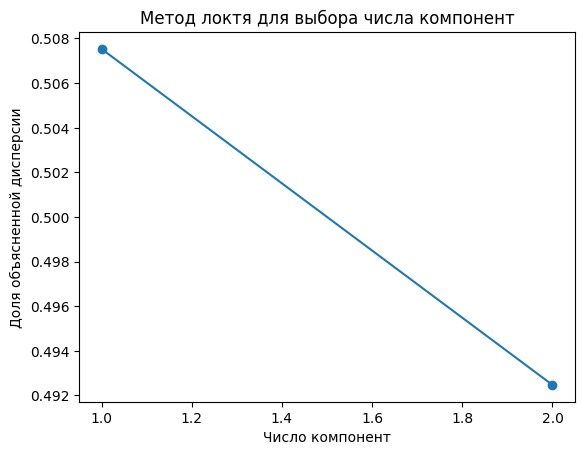

In [72]:
# Создаем экземпляр PCA
pca = PCA()

# Обучаем PCA на данный X
pca.fit(X_stand)

# Строим график объясненной дисперсии
explained_variance_ratio = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel("Число компонент")
plt.ylabel("Доля объясненной дисперсии")
plt.title("Метод локтя для выбора числа компонент")
plt.show()

#### Набор features_2 точно можно сжать, сохранится минимум половина информации

In [73]:
reduced_sets = []
for ds_ in ds_by_clusters:
    X = ds_.copy()
    y = X.pop("Соотношение матрица-наполнитель")
    X = X.loc[:, features_2]

    # Стандартизация
    X_stand = (X - X.mean(axis=0)) / X.std(axis=0)

    # Применение PCA для сокращения размерности
    pca = PCA(n_components=1)
    X_reduced = pca.fit_transform(X)

    # # Добавляем в исходный ДС
    # ds_['PCA_features_2'] = X_reduced

    reduced_sets.append(X_reduced)

In [74]:
i = 0
while i <= 9:
    # Добавляем в исходный ДС
    ds_by_clusters[i].loc[:, 'PCA_features_2'] = reduced_sets[i]
    i += 1

C:\Users\Danil\AppData\Local\Temp\ipykernel_12016\2112810140.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_by_clusters[i].loc[:, 'PCA_features_2'] = reduced_sets[i]
C:\Users\Danil\AppData\Local\Temp\ipykernel_12016\2112810140.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_by_clusters[i].loc[:, 'PCA_features_2'] = reduced_sets[i]
C:\Users\Danil\AppData\Local\Temp\ipykernel_12016\2112810140.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [75]:
columns_without_f2 = columns.copy()
for f in features_2:
    columns_without_f2.remove(f)
columns_without_f2

['Соотношение матрица-наполнитель',
 'Плотность, кг/м3',
 'модуль упругости, ГПа',
 'Количество отвердителя, м.%',
 'Температура вспышки, С_2',
 'Поверхностная плотность, г/м2',
 'Модуль упругости при растяжении, ГПа',
 'Прочность при растяжении, МПа',
 'Угол нашивки, град',
 'Шаг нашивки',
 'Плотность нашивки',
 'Kmeans_claster']

In [76]:
columns_without_f2.append('PCA_features_2')

In [77]:
print(len(columns))
print(len(columns_without_f2))

14
13


In [78]:
# columns_without_f2.append('PCA_features_2')
# ds_1.loc[:, 'PCA_features_2'] = reduced_sets[0]
ds_by_clusters[0].loc[:, columns_without_f2].corr()

Соотношение матрица-наполнитель  \
Соотношение матрица-наполнитель                              1.000000   
Плотность, кг/м3                                            -0.247321   
модуль упругости, ГПа                                        0.088995   
Количество отвердителя, м.%                                 -0.054173   
Температура вспышки, С_2                                     0.072408   
Поверхностная плотность, г/м2                                0.040724   
Модуль упругости при растяжении, ГПа                        -0.118875   
Прочность при растяжении, МПа                                0.056413   
Угол нашивки, град                                          -0.015277   
Шаг нашивки                                                  0.109312   
Плотность нашивки                                           -0.090209   
Kmeans_claster                                                    NaN   
PCA_features_2                                               0.004312   

                                      Плотность, кг/м3  модуль упругости, ГПа  \
Соотношение матрица-наполнитель              -0.247321               0.088995   
Плотность, кг/м3                              1.000000              -0.220815   
модуль упругости, ГПа                        -0.220815               1.000000   
Количество отвердителя, м.%                   0.005691               0.039057   
Температура вспышки, С_2                      0.017243              -0.210541   
Поверхностная плотность, г/м2                 0.158114              -0.279329   
Модуль упругости при растяжении, ГПа          0.085193              -0.093265   
Прочность при растяжении, МПа                -0.219786               0.070724   
Угол нашивки, град                           -0.097276               0.168898   
Шаг нашивки                                   0.009190              -0.032719   
Плотность нашивки                             0.044722               0.065559   
Kmeans_claster                                     NaN                    NaN   
PCA_features_2                                0.043714              -0.078292   

                                      Количество отвердителя, м.%  \
Соотношение матрица-наполнитель                         -0.054173   
Плотность, кг/м3                                         0.005691   
модуль упругости, ГПа                                    0.039057   
Количество отвердителя, м.%                              1.000000   
Температура вспышки, С_2                                 0.095510   
Поверхностная плотность, г/м2                           -0.033407   
Модуль упругости при растяжении, ГПа                    -0.218153   
Прочность при растяжении, МПа                           -0.002164   
Угол нашивки, град                                       0.108587   
Шаг нашивки                                             -0.005238   
Плотность нашивки                                        0.124569   
Kmeans_claster                                                NaN   
PCA_features_2                                           0.124321   

                                      Температура вспышки, С_2  \
Соотношение матрица-наполнитель                       0.072408   
Плотность, кг/м3                                      0.017243   
модуль упругости, ГПа                                -0.210541   
Количество отвердителя, м.%                           0.095510   
Температура вспышки, С_2                              1.000000   
Поверхностная плотность, г/м2                        -0.011188   
Модуль упругости при растяжении, ГПа                  0.034169   
Прочность при растяжении, МПа                        -0.044294   
Угол нашивки, град                                    0.109191   
Шаг нашивки                                           0.024852   
Плотность нашивки                                     0.081432   
Kmeans_claster                                             NaN   
PCA_features_2                                        0

In [79]:
len(ds_by_clusters)

10

##### Эксперимент !!!!

In [80]:
columns

['Соотношение матрица-наполнитель',
 'Плотность, кг/м3',
 'модуль упругости, ГПа',
 'Количество отвердителя, м.%',
 'Содержание эпоксидных групп,%_2',
 'Температура вспышки, С_2',
 'Поверхностная плотность, г/м2',
 'Модуль упругости при растяжении, ГПа',
 'Прочность при растяжении, МПа',
 'Потребление смолы, г/м2',
 'Угол нашивки, град',
 'Шаг нашивки',
 'Плотность нашивки',
 'Kmeans_claster']

In [81]:
df.corr()

Соотношение матрица-наполнитель  \
Соотношение матрица-наполнитель                              1.000000   
Плотность, кг/м3                                             0.011033   
модуль упругости, ГПа                                        0.032246   
Количество отвердителя, м.%                                 -0.017575   
Содержание эпоксидных групп,%_2                              0.027885   
Температура вспышки, С_2                                    -0.011712   
Поверхностная плотность, г/м2                               -0.011906   
Модуль упругости при растяжении, ГПа                        -0.017502   
Прочность при растяжении, МПа                                0.036288   
Потребление смолы, г/м2                                      0.078841   
Угол нашивки, град                                          -0.031401   
Шаг нашивки                                                  0.028404   
Плотность нашивки                                           -0.005432   
Kmeans_claster                                               0.016708   

                                      Плотность, кг/м3  модуль упругости, ГПа  \
Соотношение матрица-наполнитель               0.011033               0.032246   
Плотность, кг/м3                              1.000000              -0.017544   
модуль упругости, ГПа                        -0.017544               1.000000   
Количество отвердителя, м.%                  -0.032137               0.023490   
Содержание эпоксидных групп,%_2              -0.011680              -0.006186   
Температура вспышки, С_2                     -0.018260               0.031181   
Поверхностная плотность, г/м2                 0.038236              -0.017841   
Модуль упругости при растяжении, ГПа         -0.020699               0.014482   
Прочность при растяжении, МПа                -0.074165               0.048217   
Потребление смолы, г/м2                      -0.027946              -0.007369   
Угол нашивки, град                           -0.065604              -0.020399   
Шаг нашивки                                  -0.057841              -0.007003   
Плотность нашивки                             0.082868               0.062844   
Kmeans_claster                                0.039646               0.204890   

                                      Количество отвердителя, м.%  \
Соотношение матрица-наполнитель                         -0.017575   
Плотность, кг/м3                                        -0.032137   
модуль упругости, ГПа                                    0.023490   
Количество отвердителя, м.%                              1.000000   
Содержание эпоксидных групп,%_2                          0.013484   
Температура вспышки, С_2                                 0.081562   
Поверхностная плотность, г/м2                            0.048636   
Модуль упругости при растяжении, ГПа                    -0.076936   
Прочность при растяжении, МПа                           -0.066785   
Потребление смолы, г/м2                                  0.008184   
Угол нашивки, град                                       0.040215   
Шаг нашивки                                              0.002655   
Плотность нашивки                                        0.019772   
Kmeans_claster                                          -0.016791   

                                      Содержание эпоксидных групп,%_2  \
Соотношение матрица-наполнитель                              0.027885   
Плотность, кг/м3                                            -0.011680   
модуль упругости, ГПа                                       -0.006186   
Количество отвердителя, м.%                                  0.013484   
Содержание эпоксидных групп,%_2                              1.000000   
Температура вспышки, С_2                                    -0.008072   
Поверхностная плотность, г/м2                               -0.007685   
Модуль упругости при растяжении, ГПа                         0.064757   
Прочность при растяжении, МПа    

In [82]:
features_4 = []

In [83]:
X = df.copy()
y = X.pop("Соотношение матрица-наполнитель")
X = X.loc[:, features_2]

# Стандартизация
X_stand = (X - X.mean(axis=0)) / X.std(axis=0)

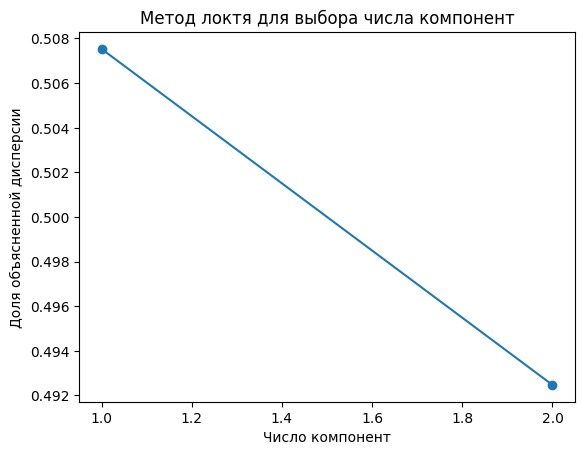

In [84]:
# Создаем экземпляр PCA
pca = PCA()

# Обучаем PCA на данный X
pca.fit(X_stand)

# Строим график объясненной дисперсии
explained_variance_ratio = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel("Число компонент")
plt.ylabel("Доля объясненной дисперсии")
plt.title("Метод локтя для выбора числа компонент")
plt.show()

# Эксперимент 2 !!!
суть: выше мы разбили ДС на кластеры, теперь, я могу в каждом из этих кластеров найти параметры с наибольшей корреляцией и с наименьшей, топ 3 по каждому кластеру.

По идее в каждом из кластеров будуд какие-то объединенные значения сильно коррелировать, в целом можно попробовать объединить все, а при обучении НС по идее первые слои должны будут быть под классификацию, а в МЛ алгоритме линейной регрессии по идее можно использовать ансабли решателей

## Шаг 1
Выясняем параметры с наибольшей корреляцией в каждом кластере

In [85]:
corr = ds_by_clusters[0].corr()
corr_value = corr["Соотношение матрица-наполнитель"].sort_values()
corr_value.pop("Соотношение матрица-наполнитель")
corr_value.pop('Kmeans_claster')
corr_value.pop('PCA_features_2')
corr_value[0].item()

C:\Users\Danil\AppData\Local\Temp\ipykernel_12016\164152952.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  corr_value[0].item()


-0.24732075269507767

In [86]:
corr_value.index[0]

'Плотность, кг/м3'

In [87]:
corr_value.index[0]

'Плотность, кг/м3'

In [88]:
top_indexes_sets = []
for ds_ in ds_by_clusters:
    # Get correlation
    corr = ds_.corr()
    corr_value = corr["Соотношение матрица-наполнитель"].sort_values()
    # Delete unusable elements
    corr_value.pop("Соотношение матрица-наполнитель") # The highest correlation (obviously)
    corr_value.pop('Kmeans_claster')
    corr_value.pop('PCA_features_2')
    # Select top 3 items on up and down in corr matrix
    top_indexes = [corr_value.index[0],
                   corr_value.index[1],
                   corr_value.index[2],
                   corr_value.index[-1],
                   corr_value.index[-2],
                   corr_value.index[-3]]
    # Add set in global array
    top_indexes_sets.append(top_indexes)

In [89]:
top_indexes_sets

[['Плотность, кг/м3',
  'Модуль упругости при растяжении, ГПа',
  'Плотность нашивки',
  'Шаг нашивки',
  'модуль упругости, ГПа',
  'Температура вспышки, С_2'],
 ['Плотность нашивки',
  'Модуль упругости при растяжении, ГПа',
  'Прочность при растяжении, МПа',
  'Поверхностная плотность, г/м2',
  'Потребление смолы, г/м2',
  'Шаг нашивки'],
 ['Плотность, кг/м3',
  'Поверхностная плотность, г/м2',
  'Шаг нашивки',
  'Содержание эпоксидных групп,%_2',
  'Угол нашивки, град',
  'Потребление смолы, г/м2'],
 ['Количество отвердителя, м.%',
  'модуль упругости, ГПа',
  'Плотность, кг/м3',
  'Модуль упругости при растяжении, ГПа',
  'Потребление смолы, г/м2',
  'Плотность нашивки'],
 ['Поверхностная плотность, г/м2',
  'Температура вспышки, С_2',
  'Содержание эпоксидных групп,%_2',
  'Потребление смолы, г/м2',
  'модуль упругости, ГПа',
  'Шаг нашивки'],
 ['Температура вспышки, С_2',
  'Угол нашивки, град',
  'Количество отвердителя, м.%',
  'Плотность, кг/м3',
  'Шаг нашивки',
  'Модуль уп

## Шаг 2
Прогоним в каждом кластере РСА по данным сетам

In [90]:
ds_by_clusters[0].columns.tolist()

['Соотношение матрица-наполнитель',
 'Плотность, кг/м3',
 'модуль упругости, ГПа',
 'Количество отвердителя, м.%',
 'Содержание эпоксидных групп,%_2',
 'Температура вспышки, С_2',
 'Поверхностная плотность, г/м2',
 'Модуль упругости при растяжении, ГПа',
 'Прочность при растяжении, МПа',
 'Потребление смолы, г/м2',
 'Угол нашивки, град',
 'Шаг нашивки',
 'Плотность нашивки',
 'Kmeans_claster',
 'PCA_features_2']

In [91]:
reduced_sets = []
i = 0
for ds_ in ds_by_clusters:
    X = ds_.copy()
    y = X.pop("Соотношение матрица-наполнитель")
    X = X.loc[:, top_indexes_sets[i]]

    # Стандартизация
    X_stand = (X - X.mean(axis=0)) / X.std(axis=0)

    # Применение PCA для сокращения размерности
    pca = PCA(n_components=1)
    X_reduced = pca.fit_transform(X)

    # # Добавляем в исходный ДС
    # ds_['PCA_features_2'] = X_reduced

    reduced_sets.append(X_reduced)

## Шаг 3
Собираем датасеты

## Шаг 4
Склеиваем воедино, смотрим корреляции

## Так не пойдет, мне надо сделать РСА по всему ДС
Либо каждый сет по каждому ДС

In [92]:
reduced_sets = []
# i = 0
for set in top_indexes_sets:
    X = df.copy()
    y = X.pop("Соотношение матрица-наполнитель")
    X = X.loc[:, set]

    # Стандартизация
    X_stand = (X - X.mean(axis=0)) / X.std(axis=0)

    # Применение PCA для сокращения размерности
    pca = PCA(n_components=1)
    X_reduced = pca.fit_transform(X)

    # # Добавляем в исходный ДС
    # ds_['PCA_features_2'] = X_reduced

    reduced_sets.append(X_reduced)

In [93]:
new_df = df.loc[:, "Соотношение матрица-наполнитель"]

In [110]:
reduced_sets[0].shape

(1000, 1)

In [109]:
new_df.shape

(1000,)

In [96]:
new_df

23      2.587348
24      2.499918
25      2.046471
26      1.856476
27      3.305535
          ...   
1018    2.271346
1019    3.444022
1020    3.280604
1021    3.705351
1022    3.808020
Name: Соотношение матрица-наполнитель, Length: 1000, dtype: float64

In [111]:
new_df_2 = df.copy()
i = 0
while i <= 9:
    # Добавляем в исходный ДС
    # data = pd.Series(reduced_sets[i][:, 0])
    # print(data.shape, new_df.shape)
    new_df_2.loc[:, f'PCA_{i}'] = reduced_sets[i]
    i += 1

In [112]:
new_df_2.columns.tolist()

['Соотношение матрица-наполнитель',
 'Плотность, кг/м3',
 'модуль упругости, ГПа',
 'Количество отвердителя, м.%',
 'Содержание эпоксидных групп,%_2',
 'Температура вспышки, С_2',
 'Поверхностная плотность, г/м2',
 'Модуль упругости при растяжении, ГПа',
 'Прочность при растяжении, МПа',
 'Потребление смолы, г/м2',
 'Угол нашивки, град',
 'Шаг нашивки',
 'Плотность нашивки',
 'Kmeans_claster',
 'PCA_0',
 'PCA_1',
 'PCA_2',
 'PCA_3',
 'PCA_4',
 'PCA_5',
 'PCA_6',
 'PCA_7',
 'PCA_8',
 'PCA_9']

In [116]:
new_df_2 = new_df_2.drop(['Плотность, кг/м3',
                         'модуль упругости, ГПа',
                         'Количество отвердителя, м.%',
                         'Содержание эпоксидных групп,%_2',
                         'Температура вспышки, С_2',
                         'Поверхностная плотность, г/м2',
                         'Модуль упругости при растяжении, ГПа',
                         'Прочность при растяжении, МПа',
                         'Потребление смолы, г/м2',
                         'Угол нашивки, град',
                         'Шаг нашивки',
                         'Плотность нашивки',
                         'Kmeans_claster',], axis = 1)

In [120]:
ndf_2_corr = new_df_2.corr()
ndf_2_corr

Соотношение матрица-наполнитель     PCA_0  \
Соотношение матрица-наполнитель                         1.000000  0.032229   
PCA_0                                                   0.032229  1.000000   
PCA_1                                                  -0.036235 -0.048144   
PCA_2                                                  -0.011909 -0.017948   
PCA_3                                                   0.032212  1.000000   
PCA_4                                                   0.032710  0.998932   
PCA_5                                                  -0.012414  0.018021   
PCA_6                                                  -0.011921 -0.017935   
PCA_7                                                  -0.011208  0.018703   
PCA_8                                                  -0.006896  0.018003   
PCA_9                                                   0.032710  0.998931   

                                    PCA_1     PCA_2     PCA_3     PCA_4  \
Соотношение матрица-наполнитель -0.036235 -0.011909  0.032212  0.032710   
PCA_0                           -0.048144 -0.017948  1.000000  0.998932   
PCA_1                            1.000000 -0.019849 -0.048139 -0.047052   
PCA_2                           -0.019849  1.000000 -0.017947 -0.064117   
PCA_3                           -0.048139 -0.017947  1.000000  0.998932   
PCA_4                           -0.047052 -0.064117  0.998932  1.000000   
PCA_5                           -0.074014 -0.038452  0.018007  0.018722   
PCA_6                           -0.019815  1.000000 -0.017934 -0.064105   
PCA_7                           -0.073236 -0.040446  0.018689  0.019492   
PCA_8                           -0.074686 -0.040416  0.017978  0.018780   
PCA_9                           -0.047053 -0.064129  0.998931  1.000000   

                                    PCA_5     PCA_6     PCA_7     PCA_8  \
Соотношение матрица-наполнитель -0.012414 -0.011921 -0.011208 -0.006896   
PCA_0                            0.018021 -0.017935  0.018703  0.018003   
PCA_1                           -0.074014 -0.019815 -0.073236 -0.074686   
PCA_2                           -0.038452  1.000000 -0.040446 -0.040416   
PCA_3                            0.018007 -0.017934  0.018689  0.017978   
PCA_4                            0.018722 -0.064105  0.019492  0.018780   
PCA_5                            1.000000 -0.038432  0.999235  0.997774   
PCA_6                           -0.038432  1.000000 -0.040426 -0.040398   
PCA_7                            0.999235 -0.040426  1.000000  0.998583   
PCA_8                            0.997774 -0.040398  0.998583  1.000000   
PCA_9                            0.018715 -0.064116  0.019484  0.018773   

                                    PCA_9  
Соотношение матрица-наполнитель  0.032710  
PCA_0                            0.998931  
PCA_1                           -0.047053  
PCA_2                           -0.064129  
PCA_3                            0.998931  
PCA_4                            1.000000  
PCA_5                            0.018715  
PCA_6                           -0.064116  
PCA_7                            0.019484  
PCA_8                            0.018773  
PCA_9                            1.000000

<Axes: >

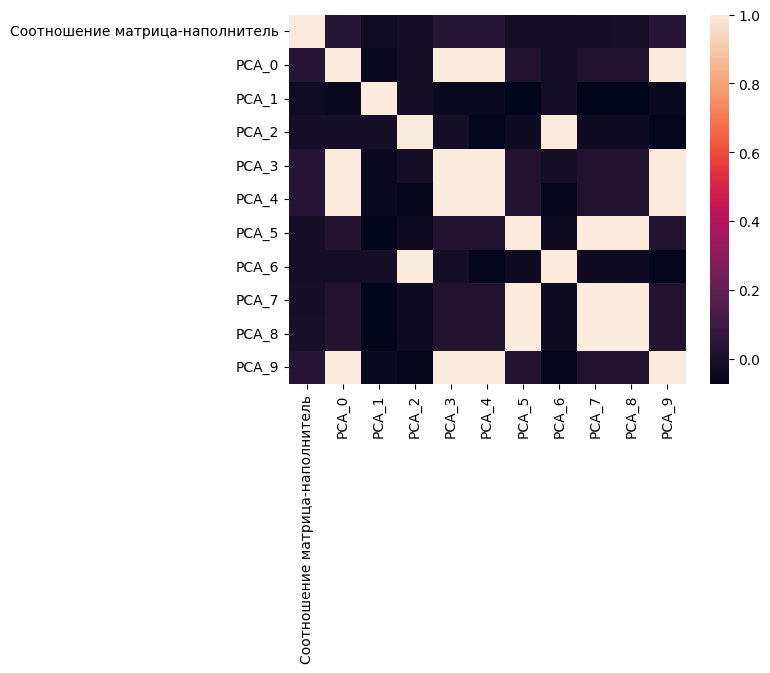

In [121]:
sns.heatmap(ndf_2_corr)

In [124]:
print(f'PCA_0 = {top_indexes_sets[0]}')
print(f'PCA_2 = {top_indexes_sets[2]}')
print(f'PCA_3 = {top_indexes_sets[3]}')
print(f'PCA_4 = {top_indexes_sets[4]}')
print(f'PCA_9 = {top_indexes_sets[9]}')

PCA_0 = ['Плотность, кг/м3', 'Модуль упругости при растяжении, ГПа', 'Плотность нашивки', 'Шаг нашивки', 'модуль упругости, ГПа', 'Температура вспышки, С_2']
PCA_2 = ['Плотность, кг/м3', 'Поверхностная плотность, г/м2', 'Шаг нашивки', 'Содержание эпоксидных групп,%_2', 'Угол нашивки, град', 'Потребление смолы, г/м2']
PCA_3 = ['Количество отвердителя, м.%', 'модуль упругости, ГПа', 'Плотность, кг/м3', 'Модуль упругости при растяжении, ГПа', 'Потребление смолы, г/м2', 'Плотность нашивки']
PCA_4 = ['Поверхностная плотность, г/м2', 'Температура вспышки, С_2', 'Содержание эпоксидных групп,%_2', 'Потребление смолы, г/м2', 'модуль упругости, ГПа', 'Шаг нашивки']
PCA_9 = ['модуль упругости, ГПа', 'Поверхностная плотность, г/м2', 'Плотность нашивки', 'Потребление смолы, г/м2', 'Температура вспышки, С_2', 'Содержание эпоксидных групп,%_2']


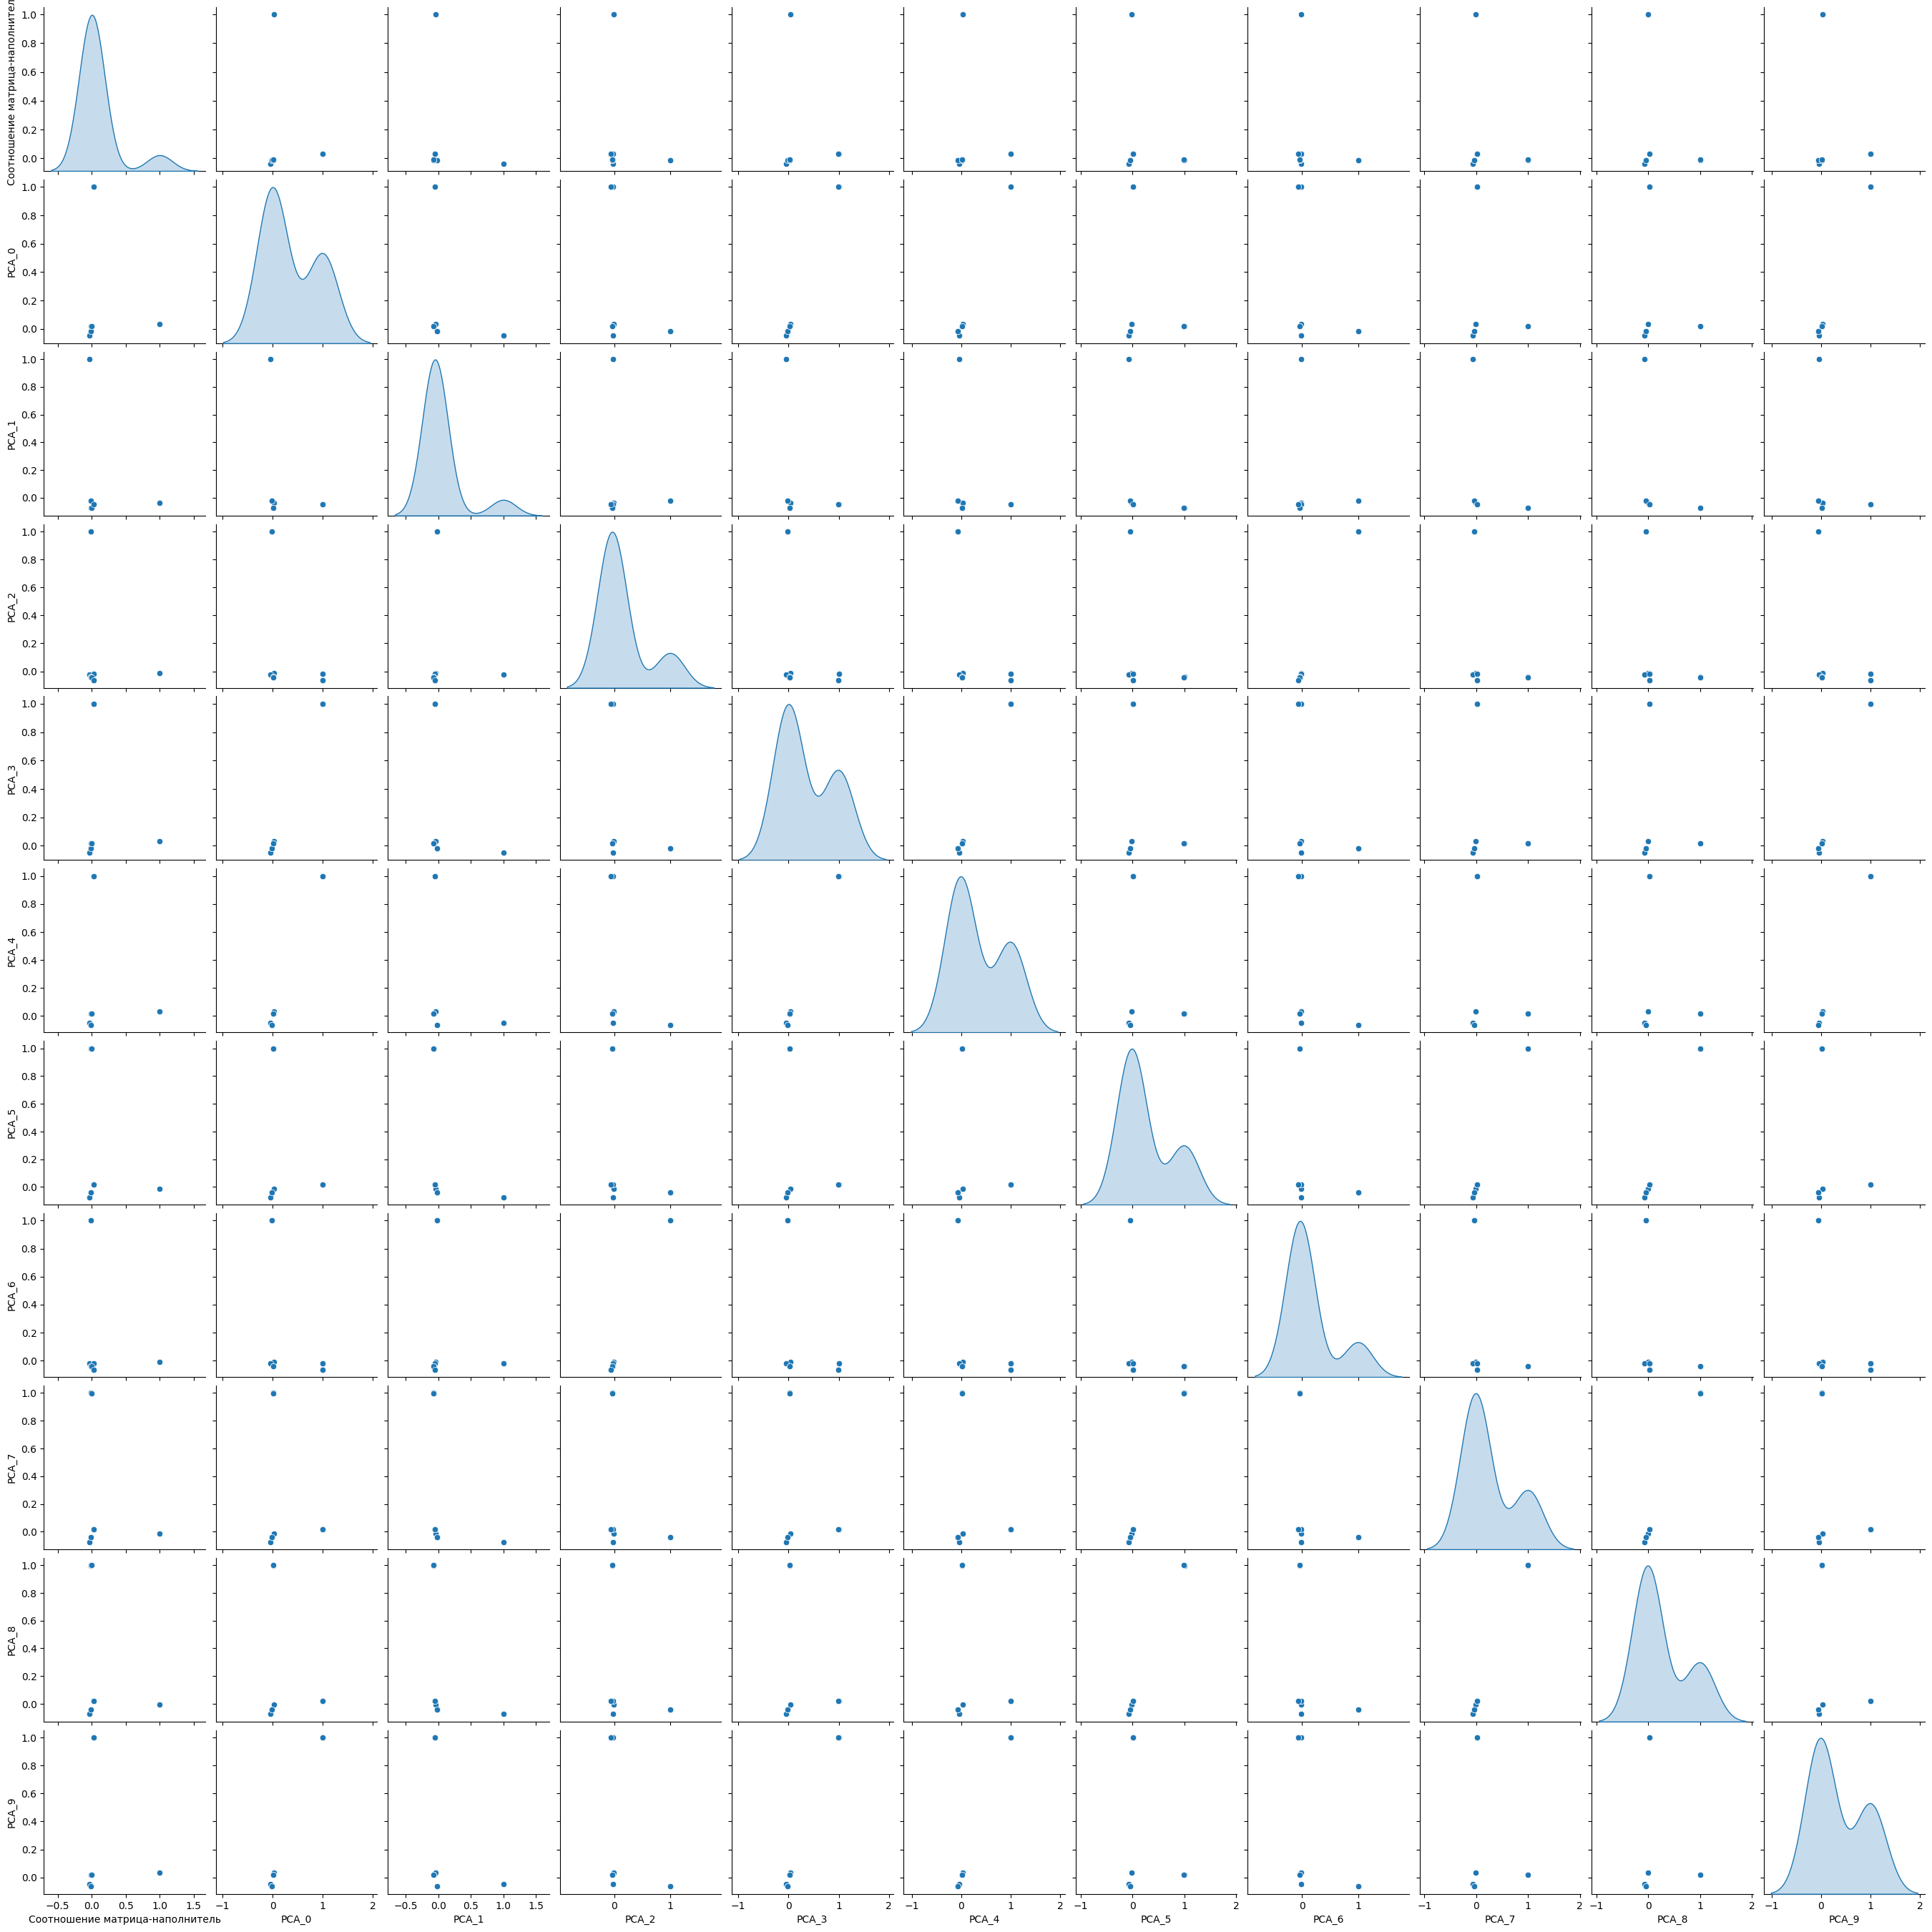

In [122]:
sns.pairplot(ndf_2_corr, diag_kind='kde')